Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import rasterio
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold
import joblib
import optuna
import matplotlib.pyplot as plt
import shap

# Load data from xls file
data = pd.read_excel("MP_Planetscope.xlsx")

# Separate features and target
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values



Building model and optimizing the hyperparameters 

In [3]:
# Define objective function for Optuna optimization
def objective(trial):
    # Set hyperparameters to optimize
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50,50), (100,50), (20,60,10), 
                                                                          (5,10,20), (100, 5, 20), (10, 10), (10, 15), (20,30)
                                                                         ,(25, 30), (40, 10, 20), (100, 50, 30), (200, 20, 10), 
                                                                          (30, 20), (150, 150)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
    solver = trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    batch_size = trial.suggest_int('batch_size', 32, 128)

    # Initialize ANN model with hyperparameters
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                         activation=activation,
                         solver=solver,
                         alpha=alpha,
                         learning_rate=learning_rate,
                         max_iter=max_iter, batch_size=batch_size,
                         random_state=42)

    # Set kfold for cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Calculate cross-validation score using R2 as evaluation metric
    score = cross_val_score(model, X, y, cv=kfold, scoring='r2')

    # Return mean of R2 scores as objective value
    return score.mean()

# Run Optuna optimization to find best hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000, show_progress_bar=True)

# Print best hyperparameters found by Optuna
print("Best hyperparameters: ", study.best_params)


[I 2023-03-03 14:36:32,965] A new study created in memory with name: no-name-0034eec8-2f58-4600-8112-e7a00f84af5a
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:36:33,800] Trial 0 finished with value: 0.026244301105030066 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07361186590186052, 'learning_rate': 'constant', 'max_iter': 673, 'batch_size': 115}. Best is trial 0 with value: 0.026244301105030066.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:36:35,494] Trial 1 finished with value: -1.2150255169666557 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.010509806066085904, 'learning_rate': 'invscaling', 'max_iter': 614, 'batch_size': 121}. Best is trial 0 with value: 0.026244301105030066.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 14:36:35,793] Trial 2 finished with value: -0.04168337490091527 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.008872487938467111, 'learning_rate': 'constant', 'max_iter': 697, 'batch_size': 107}. Best is trial 0 with value: 0.026244301105030066.
[I 2023-03-03 14:36:36,433] Trial 3 finished with value: -0.0027450487651834886 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.040447321898961025, 'learning_rate': 'invscaling', 'max_iter': 702, 'batch_size': 46}. Best is trial 0 with value: 0.026244301105030066.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:36:38,485] Trial 4 finished with value: 0.129812296693327 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.016955155662300582, 'learning_rate': 'constant', 'max_iter': 725, 'batch_size': 99}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:36:38,917] Trial 5 finished with value: -0.006315072716184922 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.09971444877657498, 'learning_rate': 'adaptive', 'max_iter': 803, 'batch_size': 74}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:36:39,173] Trial 6 finished with value: -1.242240951286772 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002819487891084552, 'learning_rate': 'invscaling', 'max_iter': 132, 'batch_size': 90}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:36:39,780] Trial 7 finished with value: -0.20055432517812646 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0003459401653543011, 'learning_rate': 'adaptive', 'max_iter': 955, 'batch_size': 76}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:36:40,035] Trial 8 finished with value: -0.0070588873985410585 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0020945800994978236, 'learning_rate': 'constant', 'max_iter': 759, 'batch_size': 125}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str 

[I 2023-03-03 14:36:40,761] Trial 9 finished with value: 0.09910599243143178 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.07797063627530094, 'learning_rate': 'constant', 'max_iter': 389, 'batch_size': 120}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:36:40,944] Trial 10 finished with value: -0.016081429658069336 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00011890967235399427, 'learning_rate': 'constant', 'max_iter': 461, 'batch_size': 47}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:36:41,714] Trial 11 finished with value: -0.13924185988788396 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.02513225907268916, 'learning_rate': 'constant', 'max_iter': 350, 'batch_size': 98}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:36:46,572] Trial 12 finished with value: -0.34177328164090925 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.02186529630031494, 'learning_rate': 'constant', 'max_iter': 359, 'batch_size': 97}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:36:49,845] Trial 13 finished with value: -0.06787192366394061 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.09570263159301759, 'learning_rate': 'constant', 'max_iter': 489, 'batch_size': 63}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:36:49,915] Trial 14 finished with value: -0.07541381361825783 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.01028265878880177, 'learning_rate': 'constant', 'max_iter': 184, 'batch_size': 110}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (989) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (989) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:36:51,597] Trial 15 finished with value: 0.09578720245511563 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03652069322115234, 'learning_rate': 'adaptive', 'max_iter': 989, 'batch_size': 127}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:36:52,217] Trial 16 finished with value: -0.1044361899445937 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.04030961191766425, 'learning_rate': 'constant', 'max_iter': 276, 'batch_size': 88}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 14:36:52,507] Trial 17 finished with value: -0.03428292627647302 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.005359473493933432, 'learning_rate': 'constant', 'max_iter': 848, 'batch_size': 102}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:36:55,109] Trial 18 finished with value: -0.3428327027141064 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.01893308401276281, 'learning_rate': 'invscaling', 'max_iter': 555, 'batch_size': 62}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (443) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:36:55,997] Trial 19 finished with value: -0.47307424816502264 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.045207162399508664, 'learning_rate': 'adaptive', 'max_iter': 443, 'batch_size': 117}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:36:57,911] Trial 20 finished with value: -0.533543302336427 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.016141400956571877, 'learning_rate': 'constant', 'max_iter': 902, 'batch_size': 86}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (996) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (996) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:36:59,619] Trial 21 finished with value: 0.09716593982545389 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0498916525293482, 'learning_rate': 'adaptive', 'max_iter': 996, 'batch_size': 128}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (583) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (583) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:00,649] Trial 22 finished with value: 0.06281361383542239 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05153073310663802, 'learning_rate': 'adaptive', 'max_iter': 583, 'batch_size': 111}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:02,340] Trial 23 finished with value: 0.09294435667644654 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06584801566900773, 'learning_rate': 'adaptive', 'max_iter': 848, 'batch_size': 128}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (344) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (344) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:02,957] Trial 24 finished with value: 0.04467161262174513 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.029757176024516635, 'learning_rate': 'adaptive', 'max_iter': 344, 'batch_size': 105}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (244) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (244) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:03,872] Trial 25 finished with value: 0.11204625787802218 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05840664856409204, 'learning_rate': 'adaptive', 'max_iter': 244, 'batch_size': 118}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (232) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (232) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 14:37:04,759] Trial 26 finished with value: 0.12122084826677788 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.09731769132659943, 'learning_rate': 'constant', 'max_iter': 232, 'batch_size': 117}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:05,832] Trial 27 finished with value: -0.012200505823489794 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.02765085639702147, 'learning_rate': 'invscaling', 'max_iter': 230, 'batch_size': 93}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 14:37:06,332] Trial 28 finished with value: 0.05865345544506637 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.09835047556161974, 'learning_rate': 'constant', 'max_iter': 130, 'batch_size': 114}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (297) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (297) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:08,114] Trial 29 finished with value: 0.011157019679712499 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0682935404163534, 'learning_rate': 'adaptive', 'max_iter': 297, 'batch_size': 102}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:37:08,525] Trial 30 finished with value: -0.20524031365117912 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.056720171184097654, 'learning_rate': 'constant', 'max_iter': 207, 'batch_size': 81}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:08,947] Trial 31 finished with value: 0.09048387772824076 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.06748845005349607, 'learning_rate': 'constant', 'max_iter': 405, 'batch_size': 118}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:09,646] Trial 32 finished with value: 0.02396878904423405 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07259318032101049, 'learning_rate': 'constant', 'max_iter': 271, 'batch_size': 120}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 14:37:09,942] Trial 33 finished with value: -0.0249383264103026 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01714589457523338, 'learning_rate': 'constant', 'max_iter': 507, 'batch_size': 112}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:37:16,353] Trial 34 finished with value: -0.12164673108251178 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.036028167447279505, 'learning_rate': 'constant', 'max_iter': 627, 'batch_size': 33}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:17,326] Trial 35 finished with value: -0.9220289211199656 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.09067714984770384, 'learning_rate': 'invscaling', 'max_iter': 666, 'batch_size': 121}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (107) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (107) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:17,985] Trial 36 finished with value: -1.2125526905998647 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.014012176332073002, 'learning_rate': 'constant', 'max_iter': 172, 'batch_size': 115}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:37:18,182] Trial 37 finished with value: 0.012575362329654305 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.030882485142404506, 'learning_rate': 'constant', 'max_iter': 107, 'batch_size': 107}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:19,053] Trial 38 finished with value: -0.07665505853911214 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.058062365710178844, 'learning_rate': 'invscaling', 'max_iter': 394, 'batch_size': 123}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 14:37:19,360] Trial 39 finished with value: -0.016788665153389525 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.007461761958873624, 'learning_rate': 'adaptive', 'max_iter': 744, 'batch_size': 95}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 14:37:19,891] Trial 40 finished with value: 0.11075471717875555 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.024142508835339867, 'learning_rate': 'constant', 'max_iter': 317, 'batch_size': 103}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:20,424] Trial 41 finished with value: 0.1173296120151001 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04247936677185475, 'learning_rate': 'constant', 'max_iter': 240, 'batch_size': 104}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:20,968] Trial 42 finished with value: 0.12469467986803431 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.023892472528263178, 'learning_rate': 'constant', 'max_iter': 250, 'batch_size': 103}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:37:21,052] Trial 43 finished with value: -0.01432766091919877 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.041954830202915835, 'learning_rate': 'constant', 'max_iter': 247, 'batch_size': 108}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:21,464] Trial 44 finished with value: 0.08899754461601894 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.032682271214152514, 'learning_rate': 'constant', 'max_iter': 166, 'batch_size': 100}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:37:21,604] Trial 45 finished with value: -0.034401647229501654 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.022504795745810654, 'learning_rate': 'constant', 'max_iter': 235, 'batch_size': 85}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 14:37:21,726] Trial 46 finished with value: -0.026397082167088515 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.013015530777556952, 'learning_rate': 'constant', 'max_iter': 309, 'batch_size': 93}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (156) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda

[I 2023-03-03 14:37:22,029] Trial 47 finished with value: -0.010366265915683482 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.04617232146046612, 'learning_rate': 'constant', 'max_iter': 156, 'batch_size': 106}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (195) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (195) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (195) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (195) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: 

[I 2023-03-03 14:37:22,531] Trial 48 finished with value: 0.09751131272588405 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.019059731799724783, 'learning_rate': 'adaptive', 'max_iter': 195, 'batch_size': 75}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:37:22,641] Trial 49 finished with value: -0.037052370433896 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.07886278983750397, 'learning_rate': 'constant', 'max_iter': 427, 'batch_size': 97}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:23,264] Trial 50 finished with value: -0.23408352621347758 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01181366810410716, 'learning_rate': 'invscaling', 'max_iter': 350, 'batch_size': 114}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 14:37:23,840] Trial 51 finished with value: 0.10056628157999474 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02192290487462175, 'learning_rate': 'constant', 'max_iter': 317, 'batch_size': 104}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (260) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (260) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 14:37:24,437] Trial 52 finished with value: 0.1096124743638058 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.026644231447462783, 'learning_rate': 'constant', 'max_iter': 260, 'batch_size': 91}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (228) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (228) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:24,989] Trial 53 finished with value: 0.09721827846679891 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03993811734164122, 'learning_rate': 'constant', 'max_iter': 228, 'batch_size': 99}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:25,322] Trial 54 finished with value: 0.0009085859070276925 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05709361943906016, 'learning_rate': 'constant', 'max_iter': 100, 'batch_size': 67}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:37:25,407] Trial 55 finished with value: -0.009764533985229385 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.024203277629350484, 'learning_rate': 'constant', 'max_iter': 293, 'batch_size': 110}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:25,909] Trial 56 finished with value: -0.9349477100184143 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.036382392462362856, 'learning_rate': 'constant', 'max_iter': 204, 'batch_size': 124}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (330) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (330) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:26,698] Trial 57 finished with value: 0.11040634533624963 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.007608852131823555, 'learning_rate': 'adaptive', 'max_iter': 330, 'batch_size': 103}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5

[I 2023-03-03 14:37:27,279] Trial 58 finished with value: -0.010317768738073685 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.048944784986898346, 'learning_rate': 'constant', 'max_iter': 508, 'batch_size': 117}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\op

[I 2023-03-03 14:37:27,691] Trial 59 finished with value: 0.10114462499923324 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.09951442405521643, 'learning_rate': 'constant', 'max_iter': 372, 'batch_size': 109}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:37:28,040] Trial 60 finished with value: -0.015747181900118746 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.01775162034104482, 'learning_rate': 'adaptive', 'max_iter': 140, 'batch_size': 82}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:28,838] Trial 61 finished with value: 0.11026279460983417 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.008743470539616539, 'learning_rate': 'adaptive', 'max_iter': 330, 'batch_size': 101}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (279) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (279) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:29,506] Trial 62 finished with value: 0.1196425996613131 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.028104935833748297, 'learning_rate': 'adaptive', 'max_iter': 279, 'batch_size': 103}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (270) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (270) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:30,161] Trial 63 finished with value: 0.108670076489091 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.029104830849685497, 'learning_rate': 'adaptive', 'max_iter': 270, 'batch_size': 97}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (787) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (787) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:31,382] Trial 64 finished with value: 0.1059780311296423 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07352459153421383, 'learning_rate': 'adaptive', 'max_iter': 787, 'batch_size': 112}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (224) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (224) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:32,244] Trial 65 finished with value: 0.11814540578428914 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.015283966752732397, 'learning_rate': 'adaptive', 'max_iter': 224, 'batch_size': 89}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (218) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (218) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (218) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:37:32,939] Trial 66 finished with value: 0.07894834051316665 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.014842995244323016, 'learning_rate': 'adaptive', 'max_iter': 218, 'batch_size': 86}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:34,951] Trial 67 finished with value: 0.03075003161541574 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03382115789067248, 'learning_rate': 'adaptive', 'max_iter': 715, 'batch_size': 89}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (182) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (182) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:35,962] Trial 68 finished with value: 0.00510103992095301 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.05549864592807033, 'learning_rate': 'adaptive', 'max_iter': 182, 'batch_size': 91}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:36,992] Trial 69 finished with value: 0.03279472927387135 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.042877042904322336, 'learning_rate': 'adaptive', 'max_iter': 284, 'batch_size': 71}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:37:39,694] Trial 70 finished with value: -0.18400423372277327 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.018397738755569736, 'learning_rate': 'adaptive', 'max_iter': 893, 'batch_size': 94}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (256) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tu

[I 2023-03-03 14:37:40,554] Trial 71 finished with value: 0.08507741790383308 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.022242440999062293, 'learning_rate': 'constant', 'max_iter': 256, 'batch_size': 104}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (237) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (237) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:40,886] Trial 72 finished with value: -1.4700138105319727 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.011371201354673984, 'learning_rate': 'invscaling', 'max_iter': 237, 'batch_size': 106}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (204) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (204) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:41,397] Trial 73 finished with value: 0.11109728764839717 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.025642329238478517, 'learning_rate': 'adaptive', 'max_iter': 204, 'batch_size': 99}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (136) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (136) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distribut

[I 2023-03-03 14:37:41,686] Trial 74 finished with value: 0.059680342132582484 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.029817504981516908, 'learning_rate': 'adaptive', 'max_iter': 136, 'batch_size': 96}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:37:42,181] Trial 75 finished with value: 0.04291156972967414 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08104840673247474, 'learning_rate': 'adaptive', 'max_iter': 200, 'batch_size': 79}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:43,147] Trial 76 finished with value: -2.7653265848437415e-05 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.014872385211065497, 'learning_rate': 'adaptive', 'max_iter': 614, 'batch_size': 100}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:44,239] Trial 77 finished with value: 0.11315469858682906 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.061545480874894906, 'learning_rate': 'adaptive', 'max_iter': 289, 'batch_size': 117}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:45,878] Trial 78 finished with value: 0.04610119370960271 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.06515619070837722, 'learning_rate': 'adaptive', 'max_iter': 293, 'batch_size': 119}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (378) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer:

[I 2023-03-03 14:37:46,872] Trial 79 finished with value: 0.05526877102507566 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04801446008702589, 'learning_rate': 'adaptive', 'max_iter': 378, 'batch_size': 114}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (418) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (418) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:48,440] Trial 80 finished with value: 0.10622557935263284 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03790852101297498, 'learning_rate': 'adaptive', 'max_iter': 418, 'batch_size': 126}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (217) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (217) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:48,915] Trial 81 finished with value: 0.05360068457888012 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0629604175036476, 'learning_rate': 'adaptive', 'max_iter': 217, 'batch_size': 123}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:49,316] Trial 82 finished with value: 0.08691620657590893 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08510204658283647, 'learning_rate': 'adaptive', 'max_iter': 160, 'batch_size': 115}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:50,205] Trial 83 finished with value: 0.11768441018784863 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.025611165886784575, 'learning_rate': 'adaptive', 'max_iter': 236, 'batch_size': 109}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (247) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (247) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 14:37:51,133] Trial 84 finished with value: 0.10967383318623872 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.051498409064626445, 'learning_rate': 'adaptive', 'max_iter': 247, 'batch_size': 108}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (279) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (279) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:52,197] Trial 85 finished with value: -0.3183228977210267 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03479942877477585, 'learning_rate': 'invscaling', 'max_iter': 279, 'batch_size': 112}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:37:56,660] Trial 86 finished with value: -0.2672772987104216 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.019996681265037532, 'learning_rate': 'adaptive', 'max_iter': 470, 'batch_size': 121}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:37:56,762] Trial 87 finished with value: -0.06880201697783739 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.043141440219202604, 'learning_rate': 'constant', 'max_iter': 183, 'batch_size': 117}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 14:37:57,169] Trial 88 finished with value: -0.024882747285477437 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02920363167259671, 'learning_rate': 'adaptive', 'max_iter': 311, 'batch_size': 110}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:37:57,331] Trial 89 finished with value: -0.025113954992832976 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.06349467122970752, 'learning_rate': 'constant', 'max_iter': 668, 'batch_size': 106}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:37:57,951] Trial 90 finished with value: 0.07825003616389223 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.07573657884438569, 'learning_rate': 'adaptive', 'max_iter': 258, 'batch_size': 49}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (215) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (215) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:58,482] Trial 91 finished with value: 0.11501055013254564 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.027056532292359117, 'learning_rate': 'adaptive', 'max_iter': 215, 'batch_size': 101}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (232) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (232) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:59,371] Trial 92 finished with value: 0.0957105379264365 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.026183129554821497, 'learning_rate': 'adaptive', 'max_iter': 232, 'batch_size': 102}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (152) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (152) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:37:59,759] Trial 93 finished with value: 0.0870637838691641 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01668840985205051, 'learning_rate': 'adaptive', 'max_iter': 152, 'batch_size': 108}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (122) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (122) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:00,183] Trial 94 finished with value: 0.0958512168793115 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03187849063538849, 'learning_rate': 'adaptive', 'max_iter': 122, 'batch_size': 116}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 14:38:00,523] Trial 95 finished with value: -0.01600881326724901 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03790454584773644, 'learning_rate': 'constant', 'max_iter': 574, 'batch_size': 113}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (269) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (269) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 14:38:00,980] Trial 96 finished with value: 0.09509755465404626 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.021121082892467412, 'learning_rate': 'adaptive', 'max_iter': 269, 'batch_size': 119}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (182) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (182) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 14:38:01,809] Trial 97 finished with value: 0.07624932344540228 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.05440046895394051, 'learning_rate': 'constant', 'max_iter': 182, 'batch_size': 98}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (356) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (356) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:03,614] Trial 98 finished with value: -0.8197299398906799 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.08712754248220882, 'learning_rate': 'invscaling', 'max_iter': 356, 'batch_size': 104}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (334) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (334) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:04,436] Trial 99 finished with value: 0.11277554677972132 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.04195010432123605, 'learning_rate': 'adaptive', 'max_iter': 334, 'batch_size': 109}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int

[I 2023-03-03 14:38:05,032] Trial 100 finished with value: 0.09760626728738633 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.045257224514129724, 'learning_rate': 'constant', 'max_iter': 331, 'batch_size': 92}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (246) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (246) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:05,668] Trial 101 finished with value: 0.1099260993573763 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.024994973012954183, 'learning_rate': 'adaptive', 'max_iter': 246, 'batch_size': 110}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (221) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (221) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:06,302] Trial 102 finished with value: 0.11565683316048303 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.03312556552859246, 'learning_rate': 'adaptive', 'max_iter': 221, 'batch_size': 101}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (221) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (221) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:06,934] Trial 103 finished with value: 0.10018039524204414 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.034019371966285225, 'learning_rate': 'adaptive', 'max_iter': 221, 'batch_size': 105}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (295) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (295) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:07,734] Trial 104 finished with value: 0.11002163968277445 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0406730575141569, 'learning_rate': 'adaptive', 'max_iter': 295, 'batch_size': 102}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:38:08,613] Trial 105 finished with value: 0.059209590238241835 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.02082088348801266, 'learning_rate': 'adaptive', 'max_iter': 198, 'batch_size': 95}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (268) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (268) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:09,288] Trial 106 finished with value: 0.1159018962905757 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02810213101731475, 'learning_rate': 'adaptive', 'max_iter': 268, 'batch_size': 100}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:38:09,374] Trial 107 finished with value: -0.014328053514079309 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.016897863134238435, 'learning_rate': 'constant', 'max_iter': 222, 'batch_size': 100}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 14:38:09,691] Trial 108 finished with value: -0.0167848895660778 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.027887306638822208, 'learning_rate': 'adaptive', 'max_iter': 170, 'batch_size': 89}. Best is trial 4 with value: 0.129812296693327.
[I 2023-03-03 14:38:09,813] Trial 109 finished with value: -0.051157256772365226 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.012851778267995433, 'learning_rate': 'constant', 'max_iter': 277, 'batch_size': 97}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:38:10,285] Trial 110 finished with value: 0.1042842344577547 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.023745205011400178, 'learning_rate': 'adaptive', 'max_iter': 254, 'batch_size': 107}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (306) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (306) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:11,032] Trial 111 finished with value: 0.1108991262141195 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.031187525856458113, 'learning_rate': 'adaptive', 'max_iter': 306, 'batch_size': 102}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (338) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:11,836] Trial 112 finished with value: 0.1089571066151365 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01893142164012562, 'learning_rate': 'adaptive', 'max_iter': 338, 'batch_size': 94}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (235) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (235) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:12,423] Trial 113 finished with value: 0.11988184797541232 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.035995076553305104, 'learning_rate': 'adaptive', 'max_iter': 235, 'batch_size': 99}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (207) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (207) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:12,768] Trial 114 finished with value: 0.014493091718033502 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.023185800847161184, 'learning_rate': 'adaptive', 'max_iter': 207, 'batch_size': 99}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (265) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (265) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:13,268] Trial 115 finished with value: 0.10809547148546875 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.015279216549009975, 'learning_rate': 'adaptive', 'max_iter': 265, 'batch_size': 104}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:13,877] Trial 116 finished with value: 0.11714889553528804 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.027321405836442006, 'learning_rate': 'adaptive', 'max_iter': 236, 'batch_size': 96}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (236) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

[I 2023-03-03 14:38:14,444] Trial 117 finished with value: 0.11051752890369555 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.02695222650087479, 'learning_rate': 'constant', 'max_iter': 236, 'batch_size': 96}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:38:14,848] Trial 118 finished with value: -0.06863980853081744 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01932947617207146, 'learning_rate': 'adaptive', 'max_iter': 188, 'batch_size': 85}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:38:17,619] Trial 119 finished with value: 0.1221853119629134 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03483778990299398, 'learning_rate': 'constant', 'max_iter': 969, 'batch_size': 101}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (885) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (885) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:20,151] Trial 120 finished with value: -0.0010215963268907836 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03631545196931588, 'learning_rate': 'constant', 'max_iter': 885, 'batch_size': 98}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:22,085] Trial 121 finished with value: 0.09474677437601882 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03191938351669899, 'learning_rate': 'constant', 'max_iter': 724, 'batch_size': 101}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (820) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (820) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:24,195] Trial 122 finished with value: 0.10607445905132393 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.022646912788689917, 'learning_rate': 'constant', 'max_iter': 820, 'batch_size': 92}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (975) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (975) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:26,703] Trial 123 finished with value: 0.1221079912214527 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0279737396807131, 'learning_rate': 'constant', 'max_iter': 975, 'batch_size': 100}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (986) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (986) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:29,221] Trial 124 finished with value: 0.12710763445415224 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.046683117402711756, 'learning_rate': 'constant', 'max_iter': 986, 'batch_size': 95}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (971) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (971) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:31,736] Trial 125 finished with value: 0.12589426637061993 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.050917241700942084, 'learning_rate': 'constant', 'max_iter': 971, 'batch_size': 94}. Best is trial 4 with value: 0.129812296693327.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (960) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (960) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:34,162] Trial 126 finished with value: 0.1343154120140489 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04950761225318753, 'learning_rate': 'constant', 'max_iter': 960, 'batch_size': 94}. Best is trial 126 with value: 0.1343154120140489.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (978) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (978) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:36,027] Trial 127 finished with value: 0.10632984184142427 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.057257406350127445, 'learning_rate': 'constant', 'max_iter': 978, 'batch_size': 87}. Best is trial 126 with value: 0.1343154120140489.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (940) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (940) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:38,367] Trial 128 finished with value: 0.13183783573971378 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.044378269010575774, 'learning_rate': 'constant', 'max_iter': 940, 'batch_size': 94}. Best is trial 126 with value: 0.1343154120140489.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (925) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (925) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:40,703] Trial 129 finished with value: 0.13396867779848237 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05250277819036908, 'learning_rate': 'constant', 'max_iter': 925, 'batch_size': 94}. Best is trial 126 with value: 0.1343154120140489.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (939) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (939) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:43,221] Trial 130 finished with value: -1.0052250655599615 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0708031495511988, 'learning_rate': 'constant', 'max_iter': 939, 'batch_size': 91}. Best is trial 126 with value: 0.1343154120140489.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (937) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (937) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:45,565] Trial 131 finished with value: 0.13971065648052888 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04758851727347172, 'learning_rate': 'constant', 'max_iter': 937, 'batch_size': 93}. Best is trial 131 with value: 0.13971065648052888.
[I 2023-03-03 14:38:46,159] Trial 132 finished with value: 0.0002762180724268148 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05093948218527188, 'learning_rate': 'constant', 'max_iter': 937, 'batch_size': 83}. Best is trial 131 with value: 0.13971065648052888.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:38:48,608] Trial 133 finished with value: 0.1315265773115326 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.052772677399833275, 'learning_rate': 'constant', 'max_iter': 971, 'batch_size': 88}. Best is trial 131 with value: 0.13971065648052888.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (977) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (977) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:51,064] Trial 134 finished with value: 0.13658211193062392 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04856910470294815, 'learning_rate': 'constant', 'max_iter': 977, 'batch_size': 94}. Best is trial 131 with value: 0.13971065648052888.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (977) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (977) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:53,520] Trial 135 finished with value: 0.13109356307872738 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.046613000358916155, 'learning_rate': 'constant', 'max_iter': 977, 'batch_size': 93}. Best is trial 131 with value: 0.13971065648052888.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (973) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (973) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:56,023] Trial 136 finished with value: 0.136520972814416 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.048129651326894986, 'learning_rate': 'constant', 'max_iter': 973, 'batch_size': 94}. Best is trial 131 with value: 0.13971065648052888.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (968) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (968) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:38:58,481] Trial 137 finished with value: 0.13423600862458307 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05028748724488311, 'learning_rate': 'constant', 'max_iter': 968, 'batch_size': 93}. Best is trial 131 with value: 0.13971065648052888.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (916) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (916) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:00,790] Trial 138 finished with value: 0.14173158115031761 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.047897945527363074, 'learning_rate': 'constant', 'max_iter': 916, 'batch_size': 93}. Best is trial 138 with value: 0.14173158115031761.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarnin

[I 2023-03-03 14:39:03,828] Trial 139 finished with value: -0.3114787358224088 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04812797854484536, 'learning_rate': 'constant', 'max_iter': 1000, 'batch_size': 93}. Best is trial 138 with value: 0.14173158115031761.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (931) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (931) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:06,198] Trial 140 finished with value: 0.13252745324058474 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05226290182049129, 'learning_rate': 'constant', 'max_iter': 931, 'batch_size': 90}. Best is trial 138 with value: 0.14173158115031761.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (913) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (913) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:08,597] Trial 141 finished with value: 0.13386510790383552 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.053455126047837156, 'learning_rate': 'constant', 'max_iter': 913, 'batch_size': 90}. Best is trial 138 with value: 0.14173158115031761.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (916) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (916) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:10,933] Trial 142 finished with value: 0.13298892863621498 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.052627904692092456, 'learning_rate': 'constant', 'max_iter': 916, 'batch_size': 88}. Best is trial 138 with value: 0.14173158115031761.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (914) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (914) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:13,200] Trial 143 finished with value: 0.13366898501366514 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06546835299617011, 'learning_rate': 'constant', 'max_iter': 914, 'batch_size': 90}. Best is trial 138 with value: 0.14173158115031761.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (918) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (918) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:15,524] Trial 144 finished with value: 0.1328780944777089 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07123142229945902, 'learning_rate': 'constant', 'max_iter': 918, 'batch_size': 88}. Best is trial 138 with value: 0.14173158115031761.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (911) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (911) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:17,796] Trial 145 finished with value: 0.14242830912781318 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06767516850765039, 'learning_rate': 'constant', 'max_iter': 911, 'batch_size': 88}. Best is trial 145 with value: 0.14242830912781318.
[I 2023-03-03 14:39:18,376] Trial 146 finished with value: 0.0007933664721468503 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0686901613726837, 'learning_rate': 'constant', 'max_iter': 917, 'batch_size': 84}. Best is trial 145 with value: 0.14242830912781318.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:39:20,590] Trial 147 finished with value: 0.13470046186617246 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06023659682432574, 'learning_rate': 'constant', 'max_iter': 876, 'batch_size': 88}. Best is trial 145 with value: 0.14242830912781318.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (910) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (910) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:22,924] Trial 148 finished with value: 0.1334760629969543 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07912963897285179, 'learning_rate': 'constant', 'max_iter': 910, 'batch_size': 90}. Best is trial 145 with value: 0.14242830912781318.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (870) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (870) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:25,106] Trial 149 finished with value: 0.13588674785565286 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08298957715255258, 'learning_rate': 'constant', 'max_iter': 870, 'batch_size': 90}. Best is trial 145 with value: 0.14242830912781318.
[I 2023-03-03 14:39:25,822] Trial 150 finished with value: 0.01379363901756354 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08217714271141491, 'learning_rate': 'constant', 'max_iter': 866, 'batch_size': 78}. Best is trial 145 with value: 0.14242830912781318.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:39:28,270] Trial 151 finished with value: 0.13323089303538077 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0622315603742534, 'learning_rate': 'constant', 'max_iter': 923, 'batch_size': 90}. Best is trial 145 with value: 0.14242830912781318.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (909) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (909) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:30,661] Trial 152 finished with value: 0.14371728543050521 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07435490578151582, 'learning_rate': 'constant', 'max_iter': 909, 'batch_size': 87}. Best is trial 152 with value: 0.14371728543050521.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (864) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (864) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (864) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:39:32,242] Trial 153 finished with value: 0.10688967640573432 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09902707939489765, 'learning_rate': 'constant', 'max_iter': 864, 'batch_size': 86}. Best is trial 152 with value: 0.14371728543050521.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:39:34,547] Trial 154 finished with value: 0.13366922542785592 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06392223405590422, 'learning_rate': 'constant', 'max_iter': 904, 'batch_size': 90}. Best is trial 152 with value: 0.14371728543050521.
[I 2023-03-03 14:39:35,193] Trial 155 finished with value: 0.014199737790239064 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06158096556045195, 'learning_rate': 'constant', 'max_iter': 951, 'batch_size': 81}. Best is trial 152 with value: 0.14371728543050521.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:39:37,432] Trial 156 finished with value: 0.1361806554937398 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08410208246668353, 'learning_rate': 'constant', 'max_iter': 885, 'batch_size': 90}. Best is trial 152 with value: 0.14371728543050521.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (898) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (898) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:39,719] Trial 157 finished with value: 0.13462379117503487 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08148997874400454, 'learning_rate': 'constant', 'max_iter': 898, 'batch_size': 91}. Best is trial 152 with value: 0.14371728543050521.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (887) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (887) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:41,996] Trial 158 finished with value: 0.13977117347763354 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0878591796009435, 'learning_rate': 'constant', 'max_iter': 887, 'batch_size': 92}. Best is trial 152 with value: 0.14371728543050521.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (887) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (887) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:44,239] Trial 159 finished with value: 0.1357660365626881 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08342335012770094, 'learning_rate': 'constant', 'max_iter': 887, 'batch_size': 92}. Best is trial 152 with value: 0.14371728543050521.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (877) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (877) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:46,466] Trial 160 finished with value: 0.13496245345329722 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08655551332257465, 'learning_rate': 'constant', 'max_iter': 877, 'batch_size': 92}. Best is trial 152 with value: 0.14371728543050521.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (835) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (835) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:48,575] Trial 161 finished with value: 0.13671485557174784 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09240914943817868, 'learning_rate': 'constant', 'max_iter': 835, 'batch_size': 92}. Best is trial 152 with value: 0.14371728543050521.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (879) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (879) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:50,810] Trial 162 finished with value: 0.14000544571051432 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08970646618151507, 'learning_rate': 'constant', 'max_iter': 879, 'batch_size': 92}. Best is trial 152 with value: 0.14371728543050521.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (833) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (833) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:52,954] Trial 163 finished with value: 0.14755164937320409 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08833867074659872, 'learning_rate': 'constant', 'max_iter': 833, 'batch_size': 92}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (839) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (839) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (839) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:39:54,462] Trial 164 finished with value: 0.10477777363932823 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0906543702032567, 'learning_rate': 'constant', 'max_iter': 839, 'batch_size': 86}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:39:56,697] Trial 165 finished with value: 0.1364967885919796 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08518870478575506, 'learning_rate': 'constant', 'max_iter': 879, 'batch_size': 92}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (878) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (878) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:39:58,898] Trial 166 finished with value: 0.14203681563481207 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0884138509780191, 'learning_rate': 'constant', 'max_iter': 878, 'batch_size': 92}. Best is trial 163 with value: 0.14755164937320409.
[I 2023-03-03 14:39:59,477] Trial 167 finished with value: 0.0007916529658891669 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09360871651684806, 'learning_rate': 'constant', 'max_iter': 875, 'batch_size': 84}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:40:01,608] Trial 168 finished with value: 0.1389853844675165 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08577422147284411, 'learning_rate': 'constant', 'max_iter': 846, 'batch_size': 87}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (836) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (836) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:03,747] Trial 169 finished with value: 0.1340319944367091 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08557689488169655, 'learning_rate': 'constant', 'max_iter': 836, 'batch_size': 92}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (853) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (853) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:05,920] Trial 170 finished with value: 0.13804712299338182 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09847921286246483, 'learning_rate': 'constant', 'max_iter': 853, 'batch_size': 87}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (792) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (792) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:07,952] Trial 171 finished with value: 0.13461576252408713 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0990723356543074, 'learning_rate': 'constant', 'max_iter': 792, 'batch_size': 87}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (855) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (855) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:10,110] Trial 172 finished with value: 0.14241948622398787 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07509863672553438, 'learning_rate': 'constant', 'max_iter': 855, 'batch_size': 92}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (852) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (852) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:12,284] Trial 173 finished with value: 0.14209632596687333 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07439736376336903, 'learning_rate': 'constant', 'max_iter': 852, 'batch_size': 96}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (811) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (811) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:14,355] Trial 174 finished with value: 0.14417100936366686 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07436039755763298, 'learning_rate': 'constant', 'max_iter': 811, 'batch_size': 96}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (819) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (819) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:16,463] Trial 175 finished with value: 0.14385342174772292 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07510343904635904, 'learning_rate': 'constant', 'max_iter': 819, 'batch_size': 96}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (816) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (816) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:18,547] Trial 176 finished with value: 0.13507328284030912 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0732440227111559, 'learning_rate': 'constant', 'max_iter': 816, 'batch_size': 97}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (855) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (855) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:20,832] Trial 177 finished with value: -1.0563516789957554 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.07325561250211075, 'learning_rate': 'constant', 'max_iter': 855, 'batch_size': 96}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (816) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (816) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:22,900] Trial 178 finished with value: 0.1413796436688353 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09825072791257207, 'learning_rate': 'constant', 'max_iter': 816, 'batch_size': 96}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (801) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (801) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:24,660] Trial 179 finished with value: 0.04619490957726937 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07309894157552384, 'learning_rate': 'constant', 'max_iter': 801, 'batch_size': 96}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:26,577] Trial 180 finished with value: 0.13360600851522214 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09258551352733306, 'learning_rate': 'constant', 'max_iter': 756, 'batch_size': 95}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (829) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (829) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:28,673] Trial 181 finished with value: 0.1418037445507584 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0994424571287239, 'learning_rate': 'constant', 'max_iter': 829, 'batch_size': 97}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (832) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (832) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:30,790] Trial 182 finished with value: 0.13853948047906564 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.094192014548309, 'learning_rate': 'constant', 'max_iter': 832, 'batch_size': 98}. Best is trial 163 with value: 0.14755164937320409.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (819) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (819) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:32,901] Trial 183 finished with value: 0.14996005709710322 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09535605407770645, 'learning_rate': 'constant', 'max_iter': 819, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (837) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (837) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:34,236] Trial 184 finished with value: 0.057074705309782404 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07421519429195834, 'learning_rate': 'constant', 'max_iter': 837, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (774) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (774) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:36,231] Trial 185 finished with value: 0.13306244293603564 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09894577663827817, 'learning_rate': 'constant', 'max_iter': 774, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (819) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (819) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:38,281] Trial 186 finished with value: 0.13960767298964302 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09971676970155788, 'learning_rate': 'invscaling', 'max_iter': 819, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (813) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (813) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:39,702] Trial 187 finished with value: 0.029277094723304132 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0972320044899291, 'learning_rate': 'invscaling', 'max_iter': 813, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 14:40:40,240] Trial 188 finished with value: 0.026211080236209373 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07500995661215608, 'learning_rate': 'invscaling', 'max_iter': 854, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:40:42,328] Trial 189 finished with value: 0.1385685973560163 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0990870405210112, 'learning_rate': 'invscaling', 'max_iter': 824, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (824) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (824) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:45,001] Trial 190 finished with value: 0.0802522396881656 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06885555491259181, 'learning_rate': 'invscaling', 'max_iter': 824, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (846) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (846) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:47,157] Trial 191 finished with value: 0.13575655774397422 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07883478635247777, 'learning_rate': 'invscaling', 'max_iter': 846, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:49,202] Trial 192 finished with value: 0.13950302036381051 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09963818308073773, 'learning_rate': 'invscaling', 'max_iter': 800, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (782) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (782) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:51,030] Trial 193 finished with value: 0.1415725751429659 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09867989508293418, 'learning_rate': 'invscaling', 'max_iter': 782, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (766) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (766) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:52,875] Trial 194 finished with value: 0.13913816553803632 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07659425001506642, 'learning_rate': 'invscaling', 'max_iter': 766, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (780) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (780) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:54,721] Trial 195 finished with value: 0.14161371204059534 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06810838169111277, 'learning_rate': 'invscaling', 'max_iter': 780, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (773) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (773) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:56,522] Trial 196 finished with value: 0.14374367303398977 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.061334192467316195, 'learning_rate': 'invscaling', 'max_iter': 773, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (777) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (777) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:40:58,329] Trial 197 finished with value: 0.1425683911274419 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06524232068269954, 'learning_rate': 'invscaling', 'max_iter': 777, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (755) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (755) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:00,130] Trial 198 finished with value: 0.14394778520925086 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.062405105867916574, 'learning_rate': 'invscaling', 'max_iter': 755, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (738) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (738) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:01,883] Trial 199 finished with value: 0.14545565690907597 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06429201563370814, 'learning_rate': 'invscaling', 'max_iter': 738, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (737) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (737) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:03,649] Trial 200 finished with value: 0.144621491273692 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0645665853155814, 'learning_rate': 'invscaling', 'max_iter': 737, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:05,401] Trial 201 finished with value: 0.14510578395537646 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06405588373284099, 'learning_rate': 'invscaling', 'max_iter': 739, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (695) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (695) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:07,056] Trial 202 finished with value: 0.14069073905403748 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06333726820247727, 'learning_rate': 'invscaling', 'max_iter': 695, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (741) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (741) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:08,831] Trial 203 finished with value: 0.14693340845151726 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06545356027520854, 'learning_rate': 'invscaling', 'max_iter': 741, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (751) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (751) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:10,639] Trial 204 finished with value: 0.14467427142452008 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0594682836585574, 'learning_rate': 'invscaling', 'max_iter': 751, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:41:11,693] Trial 205 finished with value: 0.0986763737895661 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.062052032560998324, 'learning_rate': 'invscaling', 'max_iter': 748, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:41:13,427] Trial 206 finished with value: 0.14516286530845685 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05786970043995131, 'learning_rate': 'invscaling', 'max_iter': 732, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:15,210] Trial 207 finished with value: 0.14525580559499626 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.057799283213120875, 'learning_rate': 'invscaling', 'max_iter': 730, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (735) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (735) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:17,061] Trial 208 finished with value: -0.35370370663088024 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.059831488660498526, 'learning_rate': 'invscaling', 'max_iter': 735, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:18,792] Trial 209 finished with value: 0.14278464827899306 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06763398457074557, 'learning_rate': 'invscaling', 'max_iter': 716, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (703) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (703) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:20,468] Trial 210 finished with value: 0.14214676923973982 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.059122985591012915, 'learning_rate': 'invscaling', 'max_iter': 703, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:22,138] Trial 211 finished with value: 0.1419289715370709 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05762268857844512, 'learning_rate': 'invscaling', 'max_iter': 702, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (701) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (701) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:23,824] Trial 212 finished with value: 0.1447340428183452 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05763736791398238, 'learning_rate': 'invscaling', 'max_iter': 701, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (718) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (718) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:25,508] Trial 213 finished with value: 0.14389094340983383 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06649242235153845, 'learning_rate': 'invscaling', 'max_iter': 718, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (705) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (705) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:27,197] Trial 214 finished with value: 0.13847738798747994 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05870733271058495, 'learning_rate': 'invscaling', 'max_iter': 705, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (685) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (685) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:28,849] Trial 215 finished with value: 0.14200556395907343 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06779310069453805, 'learning_rate': 'invscaling', 'max_iter': 685, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (729) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (729) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:30,582] Trial 216 finished with value: 0.13516459336244407 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05770847853787765, 'learning_rate': 'invscaling', 'max_iter': 729, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (744) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (744) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:32,353] Trial 217 finished with value: 0.14483785397203325 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06732044822834957, 'learning_rate': 'invscaling', 'max_iter': 744, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (654) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (654) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C

[I 2023-03-03 14:41:35,997] Trial 218 finished with value: 0.13363268320341765 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06637361505499548, 'learning_rate': 'invscaling', 'max_iter': 654, 'batch_size': 34}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (720) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (720) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:37,735] Trial 219 finished with value: 0.1446725726549226 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05702403687403113, 'learning_rate': 'invscaling', 'max_iter': 720, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:39,496] Trial 220 finished with value: 0.14509490391467372 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06980557376836392, 'learning_rate': 'invscaling', 'max_iter': 743, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:41,313] Trial 221 finished with value: 0.14331899035862974 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06713942388284841, 'learning_rate': 'invscaling', 'max_iter': 747, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:41:42,064] Trial 222 finished with value: 0.008312888054587363 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06562658903447355, 'learning_rate': 'invscaling', 'max_iter': 746, 'batch_size': 85}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:41:43,777] Trial 223 finished with value: 0.14353615593090174 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05683322019646978, 'learning_rate': 'invscaling', 'max_iter': 730, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (726) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (726) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:45,524] Trial 224 finished with value: 0.14638839280840937 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05977340296053414, 'learning_rate': 'invscaling', 'max_iter': 726, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:47,289] Trial 225 finished with value: 0.14636679130500913 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05733124148717442, 'learning_rate': 'invscaling', 'max_iter': 730, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (735) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (735) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:49,047] Trial 226 finished with value: 0.14388138585283194 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.056781983836326454, 'learning_rate': 'invscaling', 'max_iter': 735, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (729) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (729) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:50,755] Trial 227 finished with value: 0.1440145623483526 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.055594418876973646, 'learning_rate': 'invscaling', 'max_iter': 729, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:41:51,456] Trial 228 finished with value: 0.01625133847085971 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04179812455665344, 'learning_rate': 'invscaling', 'max_iter': 762, 'batch_size': 83}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:41:52,861] Trial 229 finished with value: 0.12191763273091741 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05394190879813658, 'learning_rate': 'invscaling', 'max_iter': 721, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:41:54,621] Trial 230 finished with value: 0.14394353356368178 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04040258308437404, 'learning_rate': 'invscaling', 'max_iter': 738, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (736) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (736) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:56,370] Trial 231 finished with value: 0.14402830072152972 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05745116605164927, 'learning_rate': 'invscaling', 'max_iter': 736, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (735) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (735) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:58,092] Trial 232 finished with value: 0.14311233353833602 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05743842306550154, 'learning_rate': 'invscaling', 'max_iter': 735, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (759) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (759) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:41:59,889] Trial 233 finished with value: 0.14289760893617706 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05461643159123572, 'learning_rate': 'invscaling', 'max_iter': 759, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (680) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (680) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:01,536] Trial 234 finished with value: 0.13511075339830753 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04016801036679316, 'learning_rate': 'invscaling', 'max_iter': 680, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (715) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (715) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:03,266] Trial 235 finished with value: 0.1436476745755581 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04459049304380724, 'learning_rate': 'invscaling', 'max_iter': 715, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (741) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (741) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:05,028] Trial 236 finished with value: 0.1461557195736243 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05634770276193973, 'learning_rate': 'invscaling', 'max_iter': 741, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:06,803] Trial 237 finished with value: 0.14399695811215857 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.003135508363523169, 'learning_rate': 'invscaling', 'max_iter': 739, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:42:07,441] Trial 238 finished with value: -0.021796485331798277 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0034275815954877996, 'learning_rate': 'invscaling', 'max_iter': 744, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:42:09,198] Trial 239 finished with value: 0.14454032468094286 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05402075014202918, 'learning_rate': 'invscaling', 'max_iter': 725, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:10,894] Trial 240 finished with value: 0.1448366706823738 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04398333070092612, 'learning_rate': 'invscaling', 'max_iter': 716, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (710) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (710) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:12,614] Trial 241 finished with value: 0.14241596391905803 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.043573687996089495, 'learning_rate': 'invscaling', 'max_iter': 710, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (722) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (722) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:14,368] Trial 242 finished with value: 0.14472724164597756 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05126790524617918, 'learning_rate': 'invscaling', 'max_iter': 722, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:16,219] Trial 243 finished with value: 0.1462545759233775 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05114940322259252, 'learning_rate': 'invscaling', 'max_iter': 756, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (753) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (753) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (753) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:42:17,641] Trial 244 finished with value: 0.12944914766270305 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.053077678660985866, 'learning_rate': 'invscaling', 'max_iter': 753, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:42:19,480] Trial 245 finished with value: 0.14450238100181423 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.049368177223483974, 'learning_rate': 'invscaling', 'max_iter': 757, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (726) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (726) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:21,224] Trial 246 finished with value: 0.14334114351784766 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.047375931635542164, 'learning_rate': 'invscaling', 'max_iter': 726, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:22,897] Trial 247 finished with value: 0.13909252223140472 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.003034827644077861, 'learning_rate': 'invscaling', 'max_iter': 693, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (663) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (663) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:24,492] Trial 248 finished with value: 0.13461221489001945 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05157605685122279, 'learning_rate': 'invscaling', 'max_iter': 663, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:26,304] Trial 249 finished with value: 0.14443069481718365 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04645285244895729, 'learning_rate': 'invscaling', 'max_iter': 760, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (765) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (765) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:28,192] Trial 250 finished with value: -0.32273368834961225 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.04597137891837418, 'learning_rate': 'invscaling', 'max_iter': 765, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (721) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (721) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:29,924] Trial 251 finished with value: 0.14322193944447803 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05257111773806479, 'learning_rate': 'invscaling', 'max_iter': 721, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:31,750] Trial 252 finished with value: 0.14499948245716457 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03828731629927796, 'learning_rate': 'invscaling', 'max_iter': 756, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (791) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (791) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:33,670] Trial 253 finished with value: 0.14122994601342256 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0462657091791284, 'learning_rate': 'invscaling', 'max_iter': 791, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (759) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (759) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:34,764] Trial 254 finished with value: -0.07289734156859207 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0010604824274216313, 'learning_rate': 'invscaling', 'max_iter': 759, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:36,426] Trial 255 finished with value: 0.14140916736013523 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03940341904847007, 'learning_rate': 'invscaling', 'max_iter': 700, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (746) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (746) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:38,424] Trial 256 finished with value: 0.08728251728836378 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03813313367391335, 'learning_rate': 'invscaling', 'max_iter': 746, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:39,903] Trial 257 finished with value: 0.048495152618531656 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.042760526560333564, 'learning_rate': 'invscaling', 'max_iter': 770, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (711) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (711) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:41,147] Trial 258 finished with value: -0.005044758601131116 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05128146751785885, 'learning_rate': 'invscaling', 'max_iter': 711, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (680) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (680) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:42,770] Trial 259 finished with value: 0.1387442487100536 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05923255574392685, 'learning_rate': 'invscaling', 'max_iter': 680, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (786) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (786) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:44,638] Trial 260 finished with value: 0.14435338726052738 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04910259498629662, 'learning_rate': 'invscaling', 'max_iter': 786, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (794) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (794) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (794) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (794) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 14:42:47,257] Trial 261 finished with value: 0.08093851024508643 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.046727808443860375, 'learning_rate': 'invscaling', 'max_iter': 794, 'batch_size': 55}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (784) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (784) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:49,426] Trial 262 finished with value: -0.15277883481262103 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.040697592949032094, 'learning_rate': 'invscaling', 'max_iter': 784, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[I 2023-03-03 14:42:51,498] Trial 263 finished with value: -0.12880130117511407 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.07511106816605058, 'learning_rate': 'invscaling', 'max_iter': 776, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:42:53,319] Trial 264 finished with value: 0.14391665429258776 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.053102001825325484, 'learning_rate': 'invscaling', 'max_iter': 756, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:54,822] Trial 265 finished with value: 0.0765922148436549 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.034368214718860965, 'learning_rate': 'invscaling', 'max_iter': 756, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (723) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (723) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:42:56,554] Trial 266 finished with value: 0.1451691910636535 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06135872695271343, 'learning_rate': 'invscaling', 'max_iter': 723, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (721) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (721) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (721) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:42:57,932] Trial 267 finished with value: 0.12345962691657766 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.048171571276030896, 'learning_rate': 'invscaling', 'max_iter': 721, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:42:59,628] Trial 268 finished with value: 0.1409269107635474 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.008378544647106339, 'learning_rate': 'invscaling', 'max_iter': 695, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:01,407] Trial 269 finished with value: 0.14690514572420638 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06010697585753063, 'learning_rate': 'invscaling', 'max_iter': 734, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (735) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (735) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:03,162] Trial 270 finished with value: 0.14373743993774674 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06303983061100608, 'learning_rate': 'invscaling', 'max_iter': 735, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (640) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (640) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:04,698] Trial 271 finished with value: 0.1279045820217048 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.062234179492754255, 'learning_rate': 'invscaling', 'max_iter': 640, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (710) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (710) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:06,505] Trial 272 finished with value: -0.3810448249443219 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.06922649967998824, 'learning_rate': 'invscaling', 'max_iter': 710, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (742) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (742) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:08,289] Trial 273 finished with value: 0.14309765861196666 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05829487581862163, 'learning_rate': 'invscaling', 'max_iter': 742, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:10,007] Trial 274 finished with value: 0.14474785824218142 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05411725767411059, 'learning_rate': 'invscaling', 'max_iter': 724, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (720) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (720) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:11,575] Trial 275 finished with value: 0.03371881094590148 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07806503530620998, 'learning_rate': 'invscaling', 'max_iter': 720, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:43:12,295] Trial 276 finished with value: 0.01844061221123241 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05709180534949511, 'learning_rate': 'invscaling', 'max_iter': 680, 'batch_size': 84}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:43:13,423] Trial 277 finished with value: 0.05338580390693415 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0072348856852590335, 'learning_rate': 'invscaling', 'max_iter': 700, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (729) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (729) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:15,185] Trial 278 finished with value: 0.1433298183731389 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06803707378581297, 'learning_rate': 'invscaling', 'max_iter': 729, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:43:16,004] Trial 279 finished with value: 0.04010402824193038 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00011631073287675001, 'learning_rate': 'invscaling', 'max_iter': 744, 'batch_size': 73}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:43:16,560] Trial 280 finished with value: 0.026143305797806615 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05373291173645685, 'learning_rate': 'invscaling', 'max_iter': 713, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:43:17,799] Trial 281 finished with value: 0.027311852726195074 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06569212594192929, 'learning_rate': 'invscaling', 'max_iter': 692, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (727) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (727) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:19,666] Trial 282 finished with value: 0.14515812082441631 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03914284939395806, 'learning_rate': 'invscaling', 'max_iter': 727, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:43:20,434] Trial 283 finished with value: 0.008323656329284756 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03634439364604197, 'learning_rate': 'invscaling', 'max_iter': 725, 'batch_size': 85}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:43:22,576] Trial 284 finished with value: -0.20522873596033983 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.04099687759532337, 'learning_rate': 'invscaling', 'max_iter': 712, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (741) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (741) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:25,088] Trial 285 finished with value: 0.10656801575816648 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07799723320974976, 'learning_rate': 'invscaling', 'max_iter': 741, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (671) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (671) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:26,665] Trial 286 finished with value: 0.1389646723326446 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.058927959731979784, 'learning_rate': 'invscaling', 'max_iter': 671, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (728) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (728) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:28,390] Trial 287 finished with value: 0.14436001689410002 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07193060699581005, 'learning_rate': 'invscaling', 'max_iter': 728, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (701) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (701) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:30,070] Trial 288 finished with value: 0.14128180189454345 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.009685415649620594, 'learning_rate': 'invscaling', 'max_iter': 701, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:31,866] Trial 289 finished with value: 0.14345486795472093 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.043257464840217405, 'learning_rate': 'invscaling', 'max_iter': 743, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:33,880] Trial 290 finished with value: 0.09098600164353202 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06214886553807071, 'learning_rate': 'invscaling', 'max_iter': 770, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (720) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (720) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:35,564] Trial 291 finished with value: 0.14473788404693894 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05345498314651647, 'learning_rate': 'invscaling', 'max_iter': 720, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (688) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (688) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:36,886] Trial 292 finished with value: 0.04479276460722834 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07969805153312409, 'learning_rate': 'invscaling', 'max_iter': 688, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:38,673] Trial 293 finished with value: 0.14413857659234802 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0002301722063641247, 'learning_rate': 'invscaling', 'max_iter': 750, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (706) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (706) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:39,667] Trial 294 finished with value: -0.1433328392098196 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03659497662506995, 'learning_rate': 'invscaling', 'max_iter': 706, 'batch_size': 101}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (768) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (768) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:41,601] Trial 295 finished with value: -0.3197722994670649 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.06831022858606836, 'learning_rate': 'invscaling', 'max_iter': 768, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (605) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (605) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:42,648] Trial 296 finished with value: -0.1715991982004303 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03138546082096707, 'learning_rate': 'invscaling', 'max_iter': 605, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:44,043] Trial 297 finished with value: 0.04338601986178507 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.055333153412384956, 'learning_rate': 'invscaling', 'max_iter': 730, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:45,797] Trial 298 finished with value: 0.13929814394793147 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04449103293884759, 'learning_rate': 'invscaling', 'max_iter': 747, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:43:46,548] Trial 299 finished with value: 0.024555132174382054 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001631943799311868, 'learning_rate': 'invscaling', 'max_iter': 715, 'batch_size': 81}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:43:48,312] Trial 300 finished with value: 0.14577179692283615 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.014089924898418085, 'learning_rate': 'invscaling', 'max_iter': 735, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (690) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (690) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (690) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:43:49,547] Trial 301 finished with value: 0.06802292640996392 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03855429704744715, 'learning_rate': 'invscaling', 'max_iter': 690, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:43:51,116] Trial 302 finished with value: 0.1340587448271398 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.014679510221870827, 'learning_rate': 'invscaling', 'max_iter': 652, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (768) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (768) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:52,589] Trial 303 finished with value: 0.07824745082365407 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05024828731555551, 'learning_rate': 'invscaling', 'max_iter': 768, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (715) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (715) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:43:54,265] Trial 304 finished with value: 0.14262463757877325 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.016499911783864073, 'learning_rate': 'invscaling', 'max_iter': 715, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:43:54,976] Trial 305 finished with value: 0.018505160090162585 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.005320136092412418, 'learning_rate': 'invscaling', 'max_iter': 750, 'batch_size': 84}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:43:56,737] Trial 306 finished with value: 0.14727980139537997 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07844731827337297, 'learning_rate': 'invscaling', 'max_iter': 731, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[I 2023-03-03 14:43:57,492] Trial 307 finished with value: -0.05000415695069969 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.07886936887143728, 'learning_rate': 'invscaling', 'max_iter': 529, 'batch_size': 78}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:43:59,933] Trial 308 finished with value: -0.11493290230409454 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.030787498942285853, 'learning_rate': 'invscaling', 'max_iter': 734, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (766) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (766) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:01,806] Trial 309 finished with value: 0.14329076808460156 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.020705277184516237, 'learning_rate': 'invscaling', 'max_iter': 766, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:44:02,528] Trial 310 finished with value: 0.016537609500600327 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08146183554798932, 'learning_rate': 'invscaling', 'max_iter': 705, 'batch_size': 83}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:44:04,459] Trial 311 finished with value: 0.14466446413451786 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07215005183828052, 'learning_rate': 'invscaling', 'max_iter': 798, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:06,256] Trial 312 finished with value: 0.14502972187208724 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04884122339318239, 'learning_rate': 'invscaling', 'max_iter': 747, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (676) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (676) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:07,346] Trial 313 finished with value: 0.05119616558679343 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04378364858675124, 'learning_rate': 'invscaling', 'max_iter': 676, 'batch_size': 102}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (733) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (733) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:08,948] Trial 314 finished with value: 0.03567531776574371 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05100682396990577, 'learning_rate': 'invscaling', 'max_iter': 733, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (775) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (775) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:10,819] Trial 315 finished with value: 0.14232398880880429 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.01040888926586723, 'learning_rate': 'invscaling', 'max_iter': 775, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:12,559] Trial 316 finished with value: 0.14328758069417122 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04057014274881662, 'learning_rate': 'invscaling', 'max_iter': 725, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a cate

[I 2023-03-03 14:44:13,125] Trial 317 finished with value: 0.02636353508994973 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.018406652876377896, 'learning_rate': 'invscaling', 'max_iter': 752, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (708) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (708) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:14,372] Trial 318 finished with value: -0.5523963252025561 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0835004766422227, 'learning_rate': 'invscaling', 'max_iter': 708, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (741) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (741) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:16,763] Trial 319 finished with value: 0.1016375630402238 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03672493180301626, 'learning_rate': 'invscaling', 'max_iter': 741, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:44:18,093] Trial 320 finished with value: 0.1170540627525668 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06169118314745859, 'learning_rate': 'invscaling', 'max_iter': 693, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:44:19,830] Trial 321 finished with value: 0.14353975980706837 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04749040208692139, 'learning_rate': 'invscaling', 'max_iter': 723, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (783) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (783) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:21,694] Trial 322 finished with value: 0.14269674207565428 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07146522361530996, 'learning_rate': 'invscaling', 'max_iter': 783, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:23,477] Trial 323 finished with value: 0.14363404583309097 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05232416277712174, 'learning_rate': 'invscaling', 'max_iter': 756, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (735) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (735) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:25,230] Trial 324 finished with value: 0.14660030711791763 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06495343417907284, 'learning_rate': 'invscaling', 'max_iter': 735, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (740) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (740) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:27,005] Trial 325 finished with value: 0.14422062533219776 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0666276001590569, 'learning_rate': 'invscaling', 'max_iter': 740, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (767) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (767) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:28,953] Trial 326 finished with value: 0.09054258765297021 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08334643044561484, 'learning_rate': 'invscaling', 'max_iter': 767, 'batch_size': 103}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (703) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (703) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:30,633] Trial 327 finished with value: 0.14216753741745244 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06229542867037656, 'learning_rate': 'invscaling', 'max_iter': 703, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[I 2023-03-03 14:44:31,473] Trial 328 finished with value: 0.03633166354038153 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.023614432206512537, 'learning_rate': 'invscaling', 'max_iter': 800, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:44:33,231] Trial 329 finished with value: 0.14338332418285732 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.031203840406603647, 'learning_rate': 'invscaling', 'max_iter': 736, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (758) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (758) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:34,866] Trial 330 finished with value: -0.14092083901666247 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.07241250517913396, 'learning_rate': 'invscaling', 'max_iter': 758, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:36,584] Trial 331 finished with value: 0.14474086815690967 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08292445859322305, 'learning_rate': 'invscaling', 'max_iter': 717, 'batch_size': 102}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (723) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (723) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:37,961] Trial 332 finished with value: 0.043048362384526515 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07761627610833671, 'learning_rate': 'invscaling', 'max_iter': 723, 'batch_size': 105}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (748) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (748) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:39,721] Trial 333 finished with value: 0.1308768793696749 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08474978583717865, 'learning_rate': 'invscaling', 'max_iter': 748, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (782) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (782) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:41,550] Trial 334 finished with value: 0.14444558553200676 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06864567263537481, 'learning_rate': 'invscaling', 'max_iter': 782, 'batch_size': 102}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (672) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (672) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:42,721] Trial 335 finished with value: -0.04659943354000482 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06390193116488076, 'learning_rate': 'invscaling', 'max_iter': 672, 'batch_size': 102}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:44,278] Trial 336 finished with value: 0.07612619088158465 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.011522599458679787, 'learning_rate': 'invscaling', 'max_iter': 714, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (741) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (741) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:46,038] Trial 337 finished with value: 0.14347569458907647 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.011606846074232036, 'learning_rate': 'invscaling', 'max_iter': 741, 'batch_size': 104}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (761) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (761) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:47,853] Trial 338 finished with value: 0.1455243685034684 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08467719702173823, 'learning_rate': 'invscaling', 'max_iter': 761, 'batch_size': 101}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:49,695] Trial 339 finished with value: 0.13926398965031755 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07778544822408145, 'learning_rate': 'invscaling', 'max_iter': 770, 'batch_size': 103}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (788) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (788) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:51,576] Trial 340 finished with value: 0.14337334900816506 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07823737440917446, 'learning_rate': 'invscaling', 'max_iter': 788, 'batch_size': 106}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (758) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (758) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:44:53,142] Trial 341 finished with value: -0.18162613580405312 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.012292073076066787, 'learning_rate': 'invscaling', 'max_iter': 758, 'batch_size': 101}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:44:56,604] Trial 342 finished with value: 0.13478211741802243 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0869639549056478, 'learning_rate': 'invscaling', 'max_iter': 735, 'batch_size': 36}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:44:58,419] Trial 343 finished with value: 0.14155303717236659 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03517081593089331, 'learning_rate': 'invscaling', 'max_iter': 759, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:44:59,146] Trial 344 finished with value: 0.007703524451809862 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08630057400375217, 'learning_rate': 'invscaling', 'max_iter': 778, 'batch_size': 85}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:45:01,047] Trial 345 finished with value: 0.1404535585216192 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06933199146611406, 'learning_rate': 'invscaling', 'max_iter': 801, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (688) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (688) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:02,678] Trial 346 finished with value: 0.1392772981964056 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0855865425139662, 'learning_rate': 'invscaling', 'max_iter': 688, 'batch_size': 101}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:03,895] Trial 347 finished with value: 0.05551218645873368 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.007056791646388772, 'learning_rate': 'invscaling', 'max_iter': 747, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:05,455] Trial 348 finished with value: 0.03422023339197215 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.018807765217278897, 'learning_rate': 'invscaling', 'max_iter': 730, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (713) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (713) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:07,136] Trial 349 finished with value: 0.14632445229558663 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05957025612393055, 'learning_rate': 'invscaling', 'max_iter': 713, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:45:08,445] Trial 350 finished with value: 0.05152931564553791 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.05975347280037478, 'learning_rate': 'invscaling', 'max_iter': 766, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:45:09,167] Trial 351 finished with value: 0.016136233154614744 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0443373278082248, 'learning_rate': 'invscaling', 'max_iter': 700, 'batch_size': 83}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:45:12,453] Trial 352 finished with value: -0.013553845898349959 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0270393452439442, 'learning_rate': 'invscaling', 'max_iter': 744, 'batch_size': 64}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (462) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:14,009] Trial 353 finished with value: 0.06937220263036192 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05733709745140579, 'learning_rate': 'invscaling', 'max_iter': 462, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:45:15,269] Trial 354 finished with value: 0.016869762650043318 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04430278076715822, 'learning_rate': 'invscaling', 'max_iter': 731, 'batch_size': 85}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:45:17,095] Trial 355 finished with value: 0.1467494812342148 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06629735116316582, 'learning_rate': 'invscaling', 'max_iter': 756, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (775) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (775) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:18,923] Trial 356 finished with value: 0.14338882390215982 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06847835510508868, 'learning_rate': 'invscaling', 'max_iter': 775, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (758) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (758) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:20,736] Trial 357 finished with value: 0.1444464057944049 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06618914542852176, 'learning_rate': 'invscaling', 'max_iter': 758, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (795) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (795) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:22,637] Trial 358 finished with value: 0.14231998193799483 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0007023929556029, 'learning_rate': 'invscaling', 'max_iter': 795, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (749) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (749) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:24,452] Trial 359 finished with value: 0.1434669678544722 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.004216879194164419, 'learning_rate': 'invscaling', 'max_iter': 749, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:45:25,210] Trial 360 finished with value: 0.02333389630926872 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.012905698997959483, 'learning_rate': 'invscaling', 'max_iter': 781, 'batch_size': 80}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:45:26,857] Trial 361 finished with value: 0.14214706813072012 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.033278385237985555, 'learning_rate': 'invscaling', 'max_iter': 706, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:27,921] Trial 362 finished with value: -0.09694463664809047 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07175423977388501, 'learning_rate': 'invscaling', 'max_iter': 739, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:29,717] Trial 363 finished with value: 0.14297973745889944 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.01066996007972712, 'learning_rate': 'invscaling', 'max_iter': 756, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 14:45:32,610] Trial 364 finished with value: -0.043565282426347315 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.007099303395225896, 'learning_rate': 'invscaling', 'max_iter': 717, 'batch_size': 82}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (765) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (765) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:33,909] Trial 365 finished with value: 0.025860935471272974 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.008411340473482432, 'learning_rate': 'invscaling', 'max_iter': 765, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (736) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (736) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:35,312] Trial 366 finished with value: 0.046914179734242036 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.060073856099279496, 'learning_rate': 'invscaling', 'max_iter': 736, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (692) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (692) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:36,981] Trial 367 finished with value: 0.14307935013612702 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0020534268057018747, 'learning_rate': 'invscaling', 'max_iter': 692, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:45:37,816] Trial 368 finished with value: 0.022826697079462454 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.01524757946716229, 'learning_rate': 'invscaling', 'max_iter': 812, 'batch_size': 85}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:45:39,560] Trial 369 finished with value: 0.1437661625989501 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0483597746171572, 'learning_rate': 'invscaling', 'max_iter': 731, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (772) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (772) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:41,403] Trial 370 finished with value: 0.1426314480369451 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.021669574916636795, 'learning_rate': 'invscaling', 'max_iter': 772, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:45:42,440] Trial 371 finished with value: -0.1558600164478015 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.039468904834493466, 'learning_rate': 'invscaling', 'max_iter': 748, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:45:44,148] Trial 372 finished with value: 0.1423863691232032 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07340383271300656, 'learning_rate': 'invscaling', 'max_iter': 712, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (799) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (799) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:45,650] Trial 373 finished with value: 0.04638379758068116 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06291892055946784, 'learning_rate': 'invscaling', 'max_iter': 799, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:47,427] Trial 374 finished with value: 0.14579346453022018 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08900671755722246, 'learning_rate': 'invscaling', 'max_iter': 756, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (761) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (761) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:49,505] Trial 375 finished with value: -0.1652325092026797 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.08592552934188037, 'learning_rate': 'invscaling', 'max_iter': 761, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (784) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (784) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:51,002] Trial 376 finished with value: 0.08043361862374883 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09072336295957764, 'learning_rate': 'invscaling', 'max_iter': 784, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:52,750] Trial 377 finished with value: 0.14787782876052685 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07681235164530562, 'learning_rate': 'invscaling', 'max_iter': 747, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (762) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (762) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:54,621] Trial 378 finished with value: 0.13977453650882127 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09885613657600849, 'learning_rate': 'invscaling', 'max_iter': 762, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (745) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (745) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:56,372] Trial 379 finished with value: 0.1456747831806271 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0833217613115282, 'learning_rate': 'invscaling', 'max_iter': 745, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:58,127] Trial 380 finished with value: 0.14112016412222494 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0787649397504999, 'learning_rate': 'invscaling', 'max_iter': 739, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (727) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (727) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:45:59,858] Trial 381 finished with value: 0.1439919734172796 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08812818724880153, 'learning_rate': 'invscaling', 'max_iter': 727, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (564) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:01,210] Trial 382 finished with value: 0.09765981401755013 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07461923435585492, 'learning_rate': 'invscaling', 'max_iter': 564, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (779) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (779) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:02,463] Trial 383 finished with value: 0.05617890269965908 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09024446086255475, 'learning_rate': 'invscaling', 'max_iter': 779, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (748) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (748) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:04,227] Trial 384 finished with value: 0.14371826400319027 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.009544546036571339, 'learning_rate': 'invscaling', 'max_iter': 748, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (706) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (706) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:05,781] Trial 385 finished with value: 0.031752469139304206 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07610159865382077, 'learning_rate': 'invscaling', 'max_iter': 706, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 14:46:06,345] Trial 386 finished with value: 0.02632847596783139 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.01432837114249409, 'learning_rate': 'invscaling', 'max_iter': 727, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:46:08,330] Trial 387 finished with value: -0.2977731506182147 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.005866937812263457, 'learning_rate': 'invscaling', 'max_iter': 791, 'batch_size': 103}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (675) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (675) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:09,952] Trial 388 finished with value: 0.1375489984840428 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06341843875851963, 'learning_rate': 'invscaling', 'max_iter': 675, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (765) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (765) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:11,281] Trial 389 finished with value: 0.028546071994099243 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07687212751366501, 'learning_rate': 'invscaling', 'max_iter': 765, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:13,034] Trial 390 finished with value: 0.14418846319168835 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0987309444369767, 'learning_rate': 'invscaling', 'max_iter': 743, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (718) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (718) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:15,334] Trial 391 finished with value: 0.10766552889008818 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001024658888736412, 'learning_rate': 'invscaling', 'max_iter': 718, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (695) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (695) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:17,020] Trial 392 finished with value: 0.14085416430982461 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06901903428123178, 'learning_rate': 'invscaling', 'max_iter': 695, 'batch_size': 101}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:46:18,045] Trial 393 finished with value: -0.09207695657946786 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.012962858524533988, 'learning_rate': 'invscaling', 'max_iter': 811, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:46:18,830] Trial 394 finished with value: 0.0082797361403121 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05709916812179727, 'learning_rate': 'invscaling', 'max_iter': 751, 'batch_size': 85}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:46:20,606] Trial 395 finished with value: 0.14290378452150196 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.016401764437673313, 'learning_rate': 'invscaling', 'max_iter': 732, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (772) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (772) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:22,446] Trial 396 finished with value: 0.14289522841922964 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08143761367691134, 'learning_rate': 'invscaling', 'max_iter': 772, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (710) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (710) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:24,147] Trial 397 finished with value: 0.1439640709516162 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06319102971124435, 'learning_rate': 'invscaling', 'max_iter': 710, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:25,190] Trial 398 finished with value: -0.09693769385467524 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05374462034305383, 'learning_rate': 'invscaling', 'max_iter': 739, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (757) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (757) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:27,281] Trial 399 finished with value: -0.16748206038159613 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0882208620035923, 'learning_rate': 'invscaling', 'max_iter': 757, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:28,999] Trial 400 finished with value: 0.14492562655974356 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.003742774369556919, 'learning_rate': 'invscaling', 'max_iter': 725, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (685) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (685) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:30,193] Trial 401 finished with value: -0.030517604499308182 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.004491726486047269, 'learning_rate': 'invscaling', 'max_iter': 685, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (784) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (784) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:32,245] Trial 402 finished with value: 0.0931401709568123 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07205122075904466, 'learning_rate': 'invscaling', 'max_iter': 784, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (748) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (748) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:34,012] Trial 403 finished with value: 0.1412369121427659 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.060018504543246094, 'learning_rate': 'invscaling', 'max_iter': 748, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (768) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (768) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:35,434] Trial 404 finished with value: 0.04592561433107758 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.008901528059171417, 'learning_rate': 'invscaling', 'max_iter': 768, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (650) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:37,000] Trial 405 finished with value: 0.1281084429324239 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08709908940863136, 'learning_rate': 'invscaling', 'max_iter': 650, 'batch_size': 101}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:46:37,670] Trial 406 finished with value: 0.030491881427045685 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07035424733531576, 'learning_rate': 'invscaling', 'max_iter': 712, 'batch_size': 83}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:46:39,431] Trial 407 finished with value: 0.14521972389020796 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.051261192864466086, 'learning_rate': 'invscaling', 'max_iter': 729, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (728) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (728) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:41,158] Trial 408 finished with value: 0.1460864385488816 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0994875682703686, 'learning_rate': 'invscaling', 'max_iter': 728, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (697) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (697) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:42,501] Trial 409 finished with value: 0.04517263301088359 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09869734633202785, 'learning_rate': 'invscaling', 'max_iter': 697, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (625) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (625) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:44,089] Trial 410 finished with value: -0.48125417597841424 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.08152380059466008, 'learning_rate': 'invscaling', 'max_iter': 625, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:45,800] Trial 411 finished with value: 0.14442900381351537 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.091076376100573, 'learning_rate': 'invscaling', 'max_iter': 724, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (670) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (670) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:47,418] Trial 412 finished with value: 0.1405622151806905 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.019431656747559544, 'learning_rate': 'invscaling', 'max_iter': 670, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:49,066] Trial 413 finished with value: 0.14183607381342325 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.006040893163845714, 'learning_rate': 'invscaling', 'max_iter': 702, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:50,830] Trial 414 finished with value: 0.144739104459558 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07706889144390029, 'learning_rate': 'invscaling', 'max_iter': 725, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:46:51,572] Trial 415 finished with value: 0.031890312023111544 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.002559201557995944, 'learning_rate': 'invscaling', 'max_iter': 735, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:46:52,967] Trial 416 finished with value: 0.056474129891963876 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00015277652904422968, 'learning_rate': 'invscaling', 'max_iter': 710, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:54,753] Trial 417 finished with value: 0.14354599535505944 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05501458519797623, 'learning_rate': 'invscaling', 'max_iter': 760, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (729) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (729) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:55,904] Trial 418 finished with value: 0.05491802759887208 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.010000226616369137, 'learning_rate': 'invscaling', 'max_iter': 729, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (803) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer:

[I 2023-03-03 14:46:57,583] Trial 419 finished with value: 0.0692941337830103 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06341881323725633, 'learning_rate': 'invscaling', 'max_iter': 803, 'batch_size': 104}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (832) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (832) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:46:59,567] Trial 420 finished with value: 0.13848518350644706 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0005371633858926861, 'learning_rate': 'invscaling', 'max_iter': 832, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (692) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (692) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:01,051] Trial 421 finished with value: 0.029888123172539062 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08669793214450448, 'learning_rate': 'invscaling', 'max_iter': 692, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (778) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (778) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:03,192] Trial 422 finished with value: -0.15595683837497848 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.09749727291032816, 'learning_rate': 'invscaling', 'max_iter': 778, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (744) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (744) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:04,954] Trial 423 finished with value: 0.13334524617180904 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07652171529953726, 'learning_rate': 'invscaling', 'max_iter': 744, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 14:47:05,516] Trial 424 finished with value: 0.02614828873339965 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05093620794193269, 'learning_rate': 'invscaling', 'max_iter': 706, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:47:07,231] Trial 425 finished with value: 0.1463839770752881 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09952894197972739, 'learning_rate': 'invscaling', 'max_iter': 724, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (686) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (686) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:08,431] Trial 426 finished with value: 0.02713951543571904 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08669811621389723, 'learning_rate': 'invscaling', 'max_iter': 686, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:10,767] Trial 427 finished with value: 0.09891491865309845 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.026096260169199758, 'learning_rate': 'invscaling', 'max_iter': 714, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (723) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (723) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (723) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:47:12,118] Trial 428 finished with value: 0.12338479586861 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09562754643512637, 'learning_rate': 'invscaling', 'max_iter': 723, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:47:13,942] Trial 429 finished with value: 0.1445156770544229 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08227810690267674, 'learning_rate': 'invscaling', 'max_iter': 758, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (733) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (733) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:15,718] Trial 430 finished with value: 0.14525619416504187 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.002673470483613947, 'learning_rate': 'invscaling', 'max_iter': 733, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:47:16,442] Trial 431 finished with value: 0.007882924972990878 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001924275161138022, 'learning_rate': 'invscaling', 'max_iter': 741, 'batch_size': 85}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:47:18,011] Trial 432 finished with value: 0.019224819551090833 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09936683566702244, 'learning_rate': 'invscaling', 'max_iter': 774, 'batch_size': 70}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:47:19,944] Trial 433 finished with value: -0.32771847188027764 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0026601082315521373, 'learning_rate': 'invscaling', 'max_iter': 760, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (793) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (793) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:21,822] Trial 434 finished with value: 0.14084361033498063 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0023565421206512504, 'learning_rate': 'invscaling', 'max_iter': 793, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (701) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (701) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:22,839] Trial 435 finished with value: -0.15111780568520494 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0029517429744542775, 'learning_rate': 'invscaling', 'max_iter': 701, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (733) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (733) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:24,600] Trial 436 finished with value: 0.1434693715911053 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.003105804911422953, 'learning_rate': 'invscaling', 'max_iter': 733, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:47:25,226] Trial 437 finished with value: 0.10771709948916279 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.004407149826982157, 'learning_rate': 'invscaling', 'max_iter': 714, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:47:26,865] Trial 438 finished with value: 0.13978526742763947 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.002344393883939321, 'learning_rate': 'invscaling', 'max_iter': 677, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:47:27,823] Trial 439 finished with value: 0.0445112286318853 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0986060073792464, 'learning_rate': 'invscaling', 'max_iter': 752, 'batch_size': 76}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:47:29,773] Trial 440 finished with value: 0.13921774857008867 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0037898137982007997, 'learning_rate': 'invscaling', 'max_iter': 815, 'batch_size': 102}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (510) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:30,696] Trial 441 finished with value: -0.4783591542381453 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07650117515022442, 'learning_rate': 'invscaling', 'max_iter': 510, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 14:47:33,699] Trial 442 finished with value: 0.12969662434912194 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.02130547804679102, 'learning_rate': 'invscaling', 'max_iter': 734, 'batch_size': 51}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:47:34,377] Trial 443 finished with value: 0.03783572163201583 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.016848420959471817, 'learning_rate': 'invscaling', 'max_iter': 772, 'batch_size': 84}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:47:35,934] Trial 444 finished with value: -0.02028801334221424 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.003472622200584062, 'learning_rate': 'invscaling', 'max_iter': 718, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (748) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (748) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:37,727] Trial 445 finished with value: 0.1447478918809018 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.013427058690935799, 'learning_rate': 'invscaling', 'max_iter': 748, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (589) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:39,166] Trial 446 finished with value: 0.10780521774920249 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.02347229270735293, 'learning_rate': 'invscaling', 'max_iter': 589, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (791) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (791) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:41,032] Trial 447 finished with value: 0.14115821847029097 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0014293876102741707, 'learning_rate': 'invscaling', 'max_iter': 791, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (698) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer:

[I 2023-03-03 14:47:42,521] Trial 448 finished with value: 0.06701824596397121 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06750490852456459, 'learning_rate': 'invscaling', 'max_iter': 698, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (662) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (662) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (662) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:47:43,622] Trial 449 finished with value: 0.05586153170125174 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00531664662815885, 'learning_rate': 'invscaling', 'max_iter': 662, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:47:45,362] Trial 450 finished with value: 0.14404630287249762 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08679401190927737, 'learning_rate': 'invscaling', 'max_iter': 732, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (433) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (433) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:46,425] Trial 451 finished with value: 0.05615994445200887 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07111809396900765, 'learning_rate': 'invscaling', 'max_iter': 433, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:47:48,189] Trial 452 finished with value: 0.1434790150779386 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00841239651435103, 'learning_rate': 'invscaling', 'max_iter': 757, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (718) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (718) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:49,927] Trial 453 finished with value: 0.14321487423050247 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.059725867499741264, 'learning_rate': 'invscaling', 'max_iter': 718, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:51,757] Trial 454 finished with value: 0.14665231382317698 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07854400713197669, 'learning_rate': 'invscaling', 'max_iter': 770, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (783) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (783) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:53,752] Trial 455 finished with value: -0.30528693592833483 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.08135377003237494, 'learning_rate': 'invscaling', 'max_iter': 783, 'batch_size': 104}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:47:55,510] Trial 456 finished with value: 0.048537167626123146 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08737693097402487, 'learning_rate': 'invscaling', 'max_iter': 809, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (828) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (828) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:56,828] Trial 457 finished with value: 0.05693069749957558 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0994667964053301, 'learning_rate': 'invscaling', 'max_iter': 828, 'batch_size': 102}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (762) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (762) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:47:58,659] Trial 458 finished with value: 0.14267477914308 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06876707781610532, 'learning_rate': 'invscaling', 'max_iter': 762, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (771) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (771) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:00,465] Trial 459 finished with value: 0.13940316017667204 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07735497307248815, 'learning_rate': 'invscaling', 'max_iter': 771, 'batch_size': 105}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[I 2023-03-03 14:48:02,571] Trial 460 finished with value: -0.07584613920868526 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0766083829119597, 'learning_rate': 'invscaling', 'max_iter': 749, 'batch_size': 101}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:48:04,600] Trial 461 finished with value: 0.13934668924213792 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.014524720737662707, 'learning_rate': 'invscaling', 'max_iter': 850, 'batch_size': 107}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:48:05,378] Trial 462 finished with value: 0.02455541122393139 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.002503685533703517, 'learning_rate': 'invscaling', 'max_iter': 785, 'batch_size': 81}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:48:06,374] Trial 463 finished with value: 0.04948046716871848 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09989566656454708, 'learning_rate': 'invscaling', 'max_iter': 398, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:08,787] Trial 464 finished with value: 0.08238582598110675 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06570289226252228, 'learning_rate': 'invscaling', 'max_iter': 743, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (802) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (802) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:10,678] Trial 465 finished with value: 0.14319791094716108 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08624039831436128, 'learning_rate': 'invscaling', 'max_iter': 802, 'batch_size': 103}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 14:48:13,216] Trial 466 finished with value: -0.10360627575848066 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.056339411441387384, 'learning_rate': 'invscaling', 'max_iter': 770, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (731) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (731) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:14,996] Trial 467 finished with value: 0.1451642120231307 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0047901327324176395, 'learning_rate': 'invscaling', 'max_iter': 731, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (752) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (752) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:16,819] Trial 468 finished with value: 0.14614522973686012 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07341205532645288, 'learning_rate': 'invscaling', 'max_iter': 752, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (755) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (755) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:18,602] Trial 469 finished with value: 0.1453963160475053 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07691948594299135, 'learning_rate': 'invscaling', 'max_iter': 755, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (792) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (792) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:19,996] Trial 470 finished with value: 0.028427736424959948 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.010710551623273378, 'learning_rate': 'invscaling', 'max_iter': 792, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:21,847] Trial 471 finished with value: 0.14229338573328507 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08660163735952249, 'learning_rate': 'invscaling', 'max_iter': 770, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (757) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (757) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:22,955] Trial 472 finished with value: -0.07516688530727338 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0032994529934128533, 'learning_rate': 'invscaling', 'max_iter': 757, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:48:23,826] Trial 473 finished with value: 0.03808202968950727 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0028998356375426787, 'learning_rate': 'invscaling', 'max_iter': 784, 'batch_size': 84}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:48:25,607] Trial 474 finished with value: 0.14421102764052468 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07499759032440084, 'learning_rate': 'invscaling', 'max_iter': 754, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (775) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (775) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:27,442] Trial 475 finished with value: 0.14087394856561203 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07985451689835278, 'learning_rate': 'invscaling', 'max_iter': 775, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (810) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (810) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:28,831] Trial 476 finished with value: 0.03720102727735142 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08825501871170385, 'learning_rate': 'invscaling', 'max_iter': 810, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (748) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (748) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:30,596] Trial 477 finished with value: 0.14388630441232456 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.006792435421077194, 'learning_rate': 'invscaling', 'max_iter': 748, 'batch_size': 101}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (838) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (838) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:32,634] Trial 478 finished with value: 0.13825390534043905 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07201482988273329, 'learning_rate': 'invscaling', 'max_iter': 838, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (764) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (764) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:34,479] Trial 479 finished with value: -0.012866190898874485 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.017747369470815524, 'learning_rate': 'invscaling', 'max_iter': 764, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[I 2023-03-03 14:48:35,148] Trial 480 finished with value: 0.024247674330396228 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.09944647267809373, 'learning_rate': 'invscaling', 'max_iter': 745, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:48:37,064] Trial 481 finished with value: 0.14123909629359957 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.000361295402747447, 'learning_rate': 'invscaling', 'max_iter': 796, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (767) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (767) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:38,536] Trial 482 finished with value: 0.0482954370058065 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.012049696310051348, 'learning_rate': 'invscaling', 'max_iter': 767, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (738) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (738) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:40,305] Trial 483 finished with value: 0.14380554656667893 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0714396285094116, 'learning_rate': 'invscaling', 'max_iter': 738, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (707) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (707) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:41,989] Trial 484 finished with value: 0.14259423078661546 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08585351947570011, 'learning_rate': 'invscaling', 'max_iter': 707, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (749) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (749) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:43,447] Trial 485 finished with value: 0.07016465305417437 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0039866414960521976, 'learning_rate': 'adaptive', 'max_iter': 749, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer:

[I 2023-03-03 14:48:44,978] Trial 486 finished with value: 0.06888737386535282 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06618705663891451, 'learning_rate': 'invscaling', 'max_iter': 719, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (776) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (776) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:46,849] Trial 487 finished with value: 0.14266637958373105 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0018222447986712153, 'learning_rate': 'invscaling', 'max_iter': 776, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:48,577] Trial 488 finished with value: 0.14562736376100635 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07866734594677251, 'learning_rate': 'invscaling', 'max_iter': 734, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (753) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (753) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:50,682] Trial 489 finished with value: -0.1697554877500928 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.08048798299569541, 'learning_rate': 'constant', 'max_iter': 753, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (819) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (819) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:52,615] Trial 490 finished with value: 0.13889089076888236 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0023097739303330174, 'learning_rate': 'invscaling', 'max_iter': 819, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (789) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (789) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:54,506] Trial 491 finished with value: 0.14205266080288168 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.006478836471615216, 'learning_rate': 'invscaling', 'max_iter': 789, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:56,240] Trial 492 finished with value: 0.14540365372961675 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08805024227189895, 'learning_rate': 'invscaling', 'max_iter': 730, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (696) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (696) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:57,787] Trial 493 finished with value: 0.030717553811048525 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08840110017656547, 'learning_rate': 'invscaling', 'max_iter': 696, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (864) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (864) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:48:59,157] Trial 494 finished with value: 0.057503369000585926 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0297971797232241, 'learning_rate': 'invscaling', 'max_iter': 864, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:49:01,357] Trial 495 finished with value: 0.14568142538793702 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07666679919709507, 'learning_rate': 'invscaling', 'max_iter': 760, 'batch_size': 43}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:02,109] Trial 496 finished with value: 0.008202442717484137 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.088222774208365, 'learning_rate': 'invscaling', 'max_iter': 775, 'batch_size': 85}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:03,075] Trial 497 finished with value: 0.05228725346523293 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07155166444487689, 'learning_rate': 'constant', 'max_iter': 718, 'batch_size': 72}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:03,791] Trial 498 finished with value: 0.03941119459101998 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09723175911542846, 'learning_rate': 'invscaling', 'max_iter': 740, 'batch_size': 82}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:04,332] Trial 499 finished with value: 0.02626154685709754 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.004802341665334567, 'learning_rate': 'invscaling', 'max_iter': 801, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:05,598] Trial 500 finished with value: 0.027662959829151033 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.099759228968141, 'learning_rate': 'invscaling', 'max_iter': 709, 'batch_size': 102}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:49:10,439] Trial 501 finished with value: 0.1134482338736551 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07780563137387655, 'learning_rate': 'invscaling', 'max_iter': 756, 'batch_size': 37}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:12,219] Trial 502 finished with value: -0.20582807623121893 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.06627172257983693, 'learning_rate': 'invscaling', 'max_iter': 735, 'batch_size': 62}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:49:14,062] Trial 503 finished with value: 0.14402533973947845 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.009111576879632611, 'learning_rate': 'invscaling', 'max_iter': 770, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 14:49:16,971] Trial 504 finished with value: 0.14098227205403663 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08404265738072997, 'learning_rate': 'invscaling', 'max_iter': 724, 'batch_size': 47}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (744) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (744) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:49:18,761] Trial 505 finished with value: 0.14685746119181836 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06396997719612522, 'learning_rate': 'constant', 'max_iter': 744, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:49:19,503] Trial 506 finished with value: 0.01654539667508126 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06199995798482167, 'learning_rate': 'constant', 'max_iter': 787, 'batch_size': 83}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:20,902] Trial 507 finished with value: 0.13245562476692058 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06458119678226537, 'learning_rate': 'constant', 'max_iter': 761, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:22,869] Trial 508 finished with value: 0.0872428764661544 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07265854310659478, 'learning_rate': 'constant', 'max_iter': 746, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (835) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (835) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (835) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (835) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 14:49:25,586] Trial 509 finished with value: 0.08533218086661501 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05790118056295075, 'learning_rate': 'constant', 'max_iter': 835, 'batch_size': 33}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:49:26,300] Trial 510 finished with value: 0.018472750833562656 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.024046741472201903, 'learning_rate': 'constant', 'max_iter': 782, 'batch_size': 84}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:27,940] Trial 511 finished with value: 0.1386021160056524 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07312920047678706, 'learning_rate': 'constant', 'max_iter': 681, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 14:49:30,606] Trial 512 finished with value: -0.010379544819567243 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013507905960574232, 'learning_rate': 'constant', 'max_iter': 760, 'batch_size': 52}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:49:33,189] Trial 513 finished with value: 0.09726388035611958 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06383006062796756, 'learning_rate': 'constant', 'max_iter': 739, 'batch_size': 65}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:34,415] Trial 514 finished with value: -0.006715680437040894 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0008264224647043654, 'learning_rate': 'constant', 'max_iter': 709, 'batch_size': 103}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:49:35,262] Trial 515 finished with value: 0.02550587549421037 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05207313383790744, 'learning_rate': 'adaptive', 'max_iter': 800, 'batch_size': 79}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:36,482] Trial 516 finished with value: 0.030353135672868393 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.02702080394728119, 'learning_rate': 'constant', 'max_iter': 767, 'batch_size': 41}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:37,898] Trial 517 finished with value: 0.13069853368738316 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07883043990792837, 'learning_rate': 'constant', 'max_iter': 743, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:39,676] Trial 518 finished with value: 0.09185722094821883 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.02161378541549457, 'learning_rate': 'invscaling', 'max_iter': 818, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (695) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (695) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:49:41,347] Trial 519 finished with value: 0.14044048002200368 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06755167778607632, 'learning_rate': 'invscaling', 'max_iter': 695, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:49:44,388] Trial 520 finished with value: 0.12972042385331373 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05946431956980846, 'learning_rate': 'invscaling', 'max_iter': 760, 'batch_size': 57}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:49:46,436] Trial 521 finished with value: 0.031277084250639554 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.01502546751605718, 'learning_rate': 'invscaling', 'max_iter': 719, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (736) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (736) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:49:48,201] Trial 522 finished with value: 0.14447040328939076 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.006892516513043445, 'learning_rate': 'constant', 'max_iter': 736, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:49:50,107] Trial 523 finished with value: 0.041951749424500286 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.04847878785873185, 'learning_rate': 'invscaling', 'max_iter': 779, 'batch_size': 76}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (749) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (749) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:49:51,886] Trial 524 finished with value: 0.14204774921341826 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03229466932086068, 'learning_rate': 'invscaling', 'max_iter': 749, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (534) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 14:49:54,137] Trial 525 finished with value: 0.1179929781775861 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.019218718011641166, 'learning_rate': 'invscaling', 'max_iter': 534, 'batch_size': 59}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (720) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (720) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:49:55,566] Trial 526 finished with value: 0.07172281842738179 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08067280454839995, 'learning_rate': 'invscaling', 'max_iter': 720, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (771) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (771) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (771) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (771) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[I 2023-03-03 14:49:58,713] Trial 527 finished with value: 0.131891938555573 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.01141120691700467, 'learning_rate': 'invscaling', 'max_iter': 771, 'batch_size': 44}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:00,404] Trial 528 finished with value: 0.13932367884214245 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09935257270739938, 'learning_rate': 'invscaling', 'max_iter': 702, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (744) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (744) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:02,049] Trial 529 finished with value: 0.037311824734852395 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07022298383036424, 'learning_rate': 'invscaling', 'max_iter': 744, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:03,809] Trial 530 finished with value: 0.14411148309372787 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05596030326541734, 'learning_rate': 'adaptive', 'max_iter': 725, 'batch_size': 105}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:50:05,066] Trial 531 finished with value: 0.03404572759773268 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08711146675097226, 'learning_rate': 'constant', 'max_iter': 800, 'batch_size': 85}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:50:06,868] Trial 532 finished with value: 0.14351448591066765 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07802005226549957, 'learning_rate': 'invscaling', 'max_iter': 758, 'batch_size': 101}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 14:50:07,440] Trial 533 finished with value: 0.02623663566142005 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00014814436771226456, 'learning_rate': 'invscaling', 'max_iter': 785, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:50:08,604] Trial 534 finished with value: 0.04737050618581229 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00949808080488664, 'learning_rate': 'invscaling', 'max_iter': 739, 'batch_size': 41}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:50:10,569] Trial 535 finished with value: -0.1946006708375966 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0647471639368116, 'learning_rate': 'invscaling', 'max_iter': 712, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (690) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (690) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:12,855] Trial 536 finished with value: 0.08863815863694742 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.004832959486414403, 'learning_rate': 'invscaling', 'max_iter': 690, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (764) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (764) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:14,689] Trial 537 finished with value: 0.1439968932139197 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04340212854580066, 'learning_rate': 'invscaling', 'max_iter': 764, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:50:15,414] Trial 538 finished with value: 0.03945368649683356 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05564615697471731, 'learning_rate': 'constant', 'max_iter': 731, 'batch_size': 82}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:50:16,941] Trial 539 finished with value: 0.03020444030403242 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08652979745224182, 'learning_rate': 'invscaling', 'max_iter': 857, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (749) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (749) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:18,863] Trial 540 finished with value: 0.13564654372984197 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09949778088225039, 'learning_rate': 'invscaling', 'max_iter': 749, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:20,603] Trial 541 finished with value: 0.14470428235625643 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07504901789147665, 'learning_rate': 'invscaling', 'max_iter': 714, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (483) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:21,824] Trial 542 finished with value: 0.06881355299212315 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06458037455243726, 'learning_rate': 'invscaling', 'max_iter': 483, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (767) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (767) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:23,656] Trial 543 finished with value: 0.1433101598921689 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.003850843754761135, 'learning_rate': 'invscaling', 'max_iter': 767, 'batch_size': 100}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (821) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (821) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:25,649] Trial 544 finished with value: 0.13976494676171697 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0011339906532667685, 'learning_rate': 'constant', 'max_iter': 821, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:50:27,532] Trial 545 finished with value: -0.24438669302539595 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.017102352743021503, 'learning_rate': 'invscaling', 'max_iter': 786, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (732) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (732) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (732) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (732) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: 

[I 2023-03-03 14:50:30,469] Trial 546 finished with value: 0.10460657391848908 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.050918718858556644, 'learning_rate': 'invscaling', 'max_iter': 732, 'batch_size': 67}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (684) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (684) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:50:32,062] Trial 547 finished with value: 0.051088402243101315 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0712356941624746, 'learning_rate': 'invscaling', 'max_iter': 684, 'batch_size': 84}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:50:33,964] Trial 548 finished with value: 0.14469078254461124 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0842133202801886, 'learning_rate': 'invscaling', 'max_iter': 752, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (710) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (710) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:35,243] Trial 549 finished with value: -0.005878404186034802 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.058818408933146084, 'learning_rate': 'invscaling', 'max_iter': 710, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (742) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (742) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:37,024] Trial 550 finished with value: 0.14395796634206046 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03381757610505021, 'learning_rate': 'invscaling', 'max_iter': 742, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (773) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (773) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:38,661] Trial 551 finished with value: 0.048640170463167196 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06997141679867075, 'learning_rate': 'constant', 'max_iter': 773, 'batch_size': 103}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:40,280] Trial 552 finished with value: 0.043874576887866515 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.013403702043743384, 'learning_rate': 'invscaling', 'max_iter': 725, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (640) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (640) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:41,910] Trial 553 finished with value: 0.12743267678814985 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04601768632782862, 'learning_rate': 'invscaling', 'max_iter': 640, 'batch_size': 127}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (807) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (807) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:43,941] Trial 554 finished with value: 0.14000397400960657 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0019755606012328755, 'learning_rate': 'adaptive', 'max_iter': 807, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (758) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (758) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:45,771] Trial 555 finished with value: 0.14299629447765932 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.007340133359902769, 'learning_rate': 'invscaling', 'max_iter': 758, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (737) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (737) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:47,824] Trial 556 finished with value: -0.17911739662785237 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.09080169382791142, 'learning_rate': 'invscaling', 'max_iter': 737, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (841) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (841) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (841) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:50:49,363] Trial 557 finished with value: 0.14297841226752803 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.005894349162694201, 'learning_rate': 'invscaling', 'max_iter': 841, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:50:51,335] Trial 558 finished with value: 0.14093107842342448 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0783323298282147, 'learning_rate': 'constant', 'max_iter': 787, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (708) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (708) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:52,947] Trial 559 finished with value: 0.07683548113018397 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0052634097698526835, 'learning_rate': 'invscaling', 'max_iter': 708, 'batch_size': 101}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer:

[I 2023-03-03 14:50:54,563] Trial 560 finished with value: 0.06858652341627239 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06312956519643947, 'learning_rate': 'invscaling', 'max_iter': 750, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (728) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (728) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:56,355] Trial 561 finished with value: 0.1422447860506255 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0002690658864862244, 'learning_rate': 'invscaling', 'max_iter': 728, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (772) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (772) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:58,193] Trial 562 finished with value: 0.14482999315610653 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.053154188418237186, 'learning_rate': 'invscaling', 'max_iter': 772, 'batch_size': 98}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (694) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (694) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:50:59,576] Trial 563 finished with value: 0.06826808579577104 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.023999323790296154, 'learning_rate': 'invscaling', 'max_iter': 694, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 14:51:00,167] Trial 564 finished with value: 0.13140310951982467 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0015757553312421141, 'learning_rate': 'constant', 'max_iter': 749, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:51:01,902] Trial 565 finished with value: 0.14774518528585884 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08762902795683775, 'learning_rate': 'invscaling', 'max_iter': 719, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:51:02,648] Trial 566 finished with value: 0.008164438771396254 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09143738538694565, 'learning_rate': 'invscaling', 'max_iter': 708, 'batch_size': 85}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:51:04,411] Trial 567 finished with value: 0.12003248532127764 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.09880727349936672, 'learning_rate': 'invscaling', 'max_iter': 694, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:51:05,455] Trial 568 finished with value: -0.5376617686939718 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.07919850835208218, 'learning_rate': 'invscaling', 'max_iter': 725, 'batch_size': 80}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:51:06,716] Trial 569 finished with value: 0.0094797482858888 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.09986305705318058, 'learning_rate': 'invscaling', 'max_iter': 675, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:51:08,067] Trial 570 finished with value: 0.030152778443617367 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08233755986322969, 'learning_rate': 'invscaling', 'max_iter': 725, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:51:10,011] Trial 571 finished with value: 0.1404493373177327 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.01093106787456209, 'learning_rate': 'constant', 'max_iter': 794, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (666) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (666) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:11,652] Trial 572 finished with value: 0.13538270484582055 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07499967498239454, 'learning_rate': 'invscaling', 'max_iter': 666, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (773) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (773) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:13,497] Trial 573 finished with value: 0.14717626109130894 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07010936064186148, 'learning_rate': 'invscaling', 'max_iter': 773, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (829) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (829) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:15,555] Trial 574 finished with value: 0.13099157259574795 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.068202462040423, 'learning_rate': 'adaptive', 'max_iter': 829, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (810) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (810) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:18,233] Trial 575 finished with value: 0.09558272700459595 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03865086203597578, 'learning_rate': 'invscaling', 'max_iter': 810, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (776) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (776) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:20,131] Trial 576 finished with value: 0.1484798020488864 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.059092534084774384, 'learning_rate': 'invscaling', 'max_iter': 776, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (796) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (796) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:22,013] Trial 577 finished with value: 0.14131216808776637 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.04690128501681478, 'learning_rate': 'invscaling', 'max_iter': 796, 'batch_size': 96}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (780) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (780) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:23,942] Trial 578 finished with value: 0.14531696164287514 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05571521174175273, 'learning_rate': 'invscaling', 'max_iter': 780, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 14:51:24,504] Trial 579 finished with value: 0.026102505545361577 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05775119522707633, 'learning_rate': 'constant', 'max_iter': 819, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:51:25,706] Trial 580 finished with value: -0.755756958015853 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.04315050175565704, 'learning_rate': 'invscaling', 'max_iter': 369, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (777) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (777) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:27,609] Trial 581 finished with value: 0.14318738556561222 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.028339053494988428, 'learning_rate': 'invscaling', 'max_iter': 777, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (798) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (798) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:29,021] Trial 582 finished with value: 0.029033956773419866 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06257816439909146, 'learning_rate': 'invscaling', 'max_iter': 798, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (765) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (765) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:30,901] Trial 583 finished with value: 0.14485533477476137 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05113680392167046, 'learning_rate': 'invscaling', 'max_iter': 765, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (781) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (781) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:32,586] Trial 584 finished with value: -0.00635593348341561 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.01917434365530413, 'learning_rate': 'invscaling', 'max_iter': 781, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:51:33,335] Trial 585 finished with value: 0.01615248376513767 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.008381302207414955, 'learning_rate': 'constant', 'max_iter': 758, 'batch_size': 83}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:51:35,482] Trial 586 finished with value: 0.09709157932038712 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06801907731249378, 'learning_rate': 'invscaling', 'max_iter': 809, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (748) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (748) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:36,568] Trial 587 finished with value: -0.08574050155421391 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00591046008165948, 'learning_rate': 'invscaling', 'max_iter': 748, 'batch_size': 94}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (768) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (768) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:38,501] Trial 588 finished with value: 0.14242945966157164 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.012849690022970438, 'learning_rate': 'invscaling', 'max_iter': 768, 'batch_size': 91}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (749) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (749) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:40,359] Trial 589 finished with value: 0.14510273956486722 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0005772553682050381, 'learning_rate': 'invscaling', 'max_iter': 749, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:51:41,604] Trial 590 finished with value: -0.5070706909311452 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.007406641692956553, 'learning_rate': 'invscaling', 'max_iter': 845, 'batch_size': 99}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (789) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (789) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:43,504] Trial 591 finished with value: 0.13375835559937813 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.02960343040158709, 'learning_rate': 'invscaling', 'max_iter': 789, 'batch_size': 95}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:44,915] Trial 592 finished with value: 0.04349733524744106 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.008400970308303142, 'learning_rate': 'constant', 'max_iter': 717, 'batch_size': 88}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (770) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:46,803] Trial 593 finished with value: 0.14554487091513002 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.05963209251841622, 'learning_rate': 'invscaling', 'max_iter': 770, 'batch_size': 93}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (754) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of 

[I 2023-03-03 14:51:48,212] Trial 594 finished with value: 0.030979159381105893 and parameters: {'hidden_layer_sizes': (20, 60, 10), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.002227828796901699, 'learning_rate': 'invscaling', 'max_iter': 754, 'batch_size': 69}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (738) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (738) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:49,638] Trial 595 finished with value: 0.047011333824325166 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07134980009933133, 'learning_rate': 'invscaling', 'max_iter': 738, 'batch_size': 97}. Best is trial 183 with value: 0.14996005709710322.
[I 2023-03-03 14:51:50,415] Trial 596 finished with value: 0.01841764596241848 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.047700178486458085, 'learning_rate': 'invscaling', 'max_iter': 706, 'batch_size': 84}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:51:52,384] Trial 597 finished with value: 0.14230276333541728 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.03813366455905038, 'learning_rate': 'adaptive', 'max_iter': 775, 'batch_size': 92}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:54,162] Trial 598 finished with value: 0.14705568156651794 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08755297814763381, 'learning_rate': 'invscaling', 'max_iter': 725, 'batch_size': 90}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (686) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (686) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:55,705] Trial 599 finished with value: 0.07738298183975838 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.08591701980577895, 'learning_rate': 'constant', 'max_iter': 686, 'batch_size': 89}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:51:57,443] Trial 600 finished with value: 0.14331713731837686 and parameters: {'hidden_layer_sizes': (40, 10, 20), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.025878122105405604, 'learning_rate': 'invscaling', 'max_iter': 717, 'batch_size': 122}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (696) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (696) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:52:01,820] Trial 601 finished with value: 0.14976614811608943 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0018164823172991654, 'learning_rate': 'invscaling', 'max_iter': 696, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (679) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (679) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (679) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:52:04,584] Trial 602 finished with value: 0.1181113501747206 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0157639415911038, 'learning_rate': 'invscaling', 'max_iter': 679, 'batch_size': 86}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:52:06,830] Trial 603 finished with value: -0.009861625882326131 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.001080770063213472, 'learning_rate': 'invscaling', 'max_iter': 698, 'batch_size': 87}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:52:07,596] Trial 604 finished with value: -0.013311960920360999 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0021512020467444964, 'learning_rate': 'invscaling', 'max_iter': 661, 'batch_size': 84}. Best is trial 183 with value: 0.14996005709710322.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:52:11,749] Trial 605 finished with value: 0.14996236249851674 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0016641042245222456, 'learning_rate': 'invscaling', 'max_iter': 697, 'batch_size': 88}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (666) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (666) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (666) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:52:14,513] Trial 606 finished with value: 0.11565524011155812 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0018527698670774127, 'learning_rate': 'constant', 'max_iter': 666, 'batch_size': 86}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:52:15,107] Trial 607 finished with value: 0.030171196947131128 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0003975584014471273, 'learning_rate': 'invscaling', 'max_iter': 683, 'batch_size': 88}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:52:18,942] Trial 608 finished with value: -0.007431760347858063 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0015531174833545124, 'learning_rate': 'invscaling', 'max_iter': 699, 'batch_size': 90}. Best is trial 605 with value: 0.14996236249851674.
[I 2023-03-03 14:52:19,772] Trial 609 finished with value: -0.0007129520767691355 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0015587592011759078, 'learning_rate': 'invscaling', 'max_iter': 700, 'batch_size': 85}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:52:20,825] Trial 610 finished with value: 0.001256469919152603 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0012619632956772766, 'learning_rate': 'invscaling', 'max_iter': 655, 'batch_size': 87}. Best is trial 605 with value: 0.14996236249851674.
[I 2023-03-03 14:52:21,714] Trial 611 finished with value: -0.009109407532910275 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007914771138314487, 'learning_rate': 'invscaling', 'max_iter': 712, 'batch_size': 82}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:52:30,037] Trial 612 finished with value: -0.5515120619414523 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0012485719529625834, 'learning_rate': 'invscaling', 'max_iter': 611, 'batch_size': 90}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (686) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (686) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:52:34,231] Trial 613 finished with value: 0.14775490932539978 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0026379628673071733, 'learning_rate': 'constant', 'max_iter': 686, 'batch_size': 92}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (665) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (665) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:52:38,212] Trial 614 finished with value: 0.143207873191118 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0016285193096705157, 'learning_rate': 'constant', 'max_iter': 665, 'batch_size': 89}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (676) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (676) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:52:42,323] Trial 615 finished with value: 0.14565167441457222 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0016217630897617686, 'learning_rate': 'constant', 'max_iter': 676, 'batch_size': 91}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (691) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (691) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:52:46,366] Trial 616 finished with value: 0.1487713242291542 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0025176578869247, 'learning_rate': 'constant', 'max_iter': 691, 'batch_size': 87}. Best is trial 605 with value: 0.14996236249851674.
[I 2023-03-03 14:52:47,188] Trial 617 finished with value: -0.0007103825608856251 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00281171159636735, 'learning_rate': 'constant', 'max_iter': 687, 'batch_size': 85}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:52:48,060] Trial 618 finished with value: -0.0003951470612062469 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0025049468607579446, 'learning_rate': 'constant', 'max_iter': 680, 'batch_size': 83}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:52:52,196] Trial 619 finished with value: 0.14755170505070034 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0018500611119401332, 'learning_rate': 'constant', 'max_iter': 685, 'batch_size': 87}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (632) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (632) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (632) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:52:54,765] Trial 620 finished with value: 0.10787588904426966 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0018525200100794816, 'learning_rate': 'constant', 'max_iter': 632, 'batch_size': 86}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:52:58,653] Trial 621 finished with value: 0.14012241563824462 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0018903587373958863, 'learning_rate': 'constant', 'max_iter': 652, 'batch_size': 87}. Best is trial 605 with value: 0.14996236249851674.
[I 2023-03-03 14:52:59,470] Trial 622 finished with value: -0.0007114555048586046 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00228907647377159, 'learning_rate': 'constant', 'max_iter': 656, 'batch_size': 85}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:53:00,158] Trial 623 finished with value: -0.0063642679824507335 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001792011448441903, 'learning_rate': 'constant', 'max_iter': 643, 'batch_size': 81}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:53:04,190] Trial 624 finished with value: 0.14477969547995428 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0014679000016870757, 'learning_rate': 'constant', 'max_iter': 672, 'batch_size': 88}. Best is trial 605 with value: 0.14996236249851674.
[I 2023-03-03 14:53:04,972] Trial 625 finished with value: -0.013311943070734156 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0020548545350400653, 'learning_rate': 'constant', 'max_iter': 676, 'batch_size': 84}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:53:09,051] Trial 626 finished with value: 0.1473396209860439 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0031971944542079286, 'learning_rate': 'constant', 'max_iter': 684, 'batch_size': 87}. Best is trial 605 with value: 0.14996236249851674.
[I 2023-03-03 14:53:09,955] Trial 627 finished with value: -0.00039419767731574407 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002867466350909296, 'learning_rate': 'constant', 'max_iter': 649, 'batch_size': 83}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:53:12,610] Trial 628 finished with value: 0.11643425872908024 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.003313849702826778, 'learning_rate': 'constant', 'max_iter': 670, 'batch_size': 86}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:53:16,741] Trial 629 finished with value: 0.1481646791207471 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0025089875318132326, 'learning_rate': 'constant', 'max_iter': 688, 'batch_size': 87}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 14:53:18,760] Trial 630 finished with value: 0.14266389917988653 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0019484333760787234, 'learning_rate': 'constant', 'max_iter': 689, 'batch_size': 87}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:53:19,580] Trial 631 finished with value: -0.0007116463739428091 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0021960248146804967, 'learning_rate': 'constant', 'max_iter': 661, 'batch_size': 85}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:53:23,397] Trial 632 finished with value: 0.13224158716283715 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002673377713046552, 'learning_rate': 'constant', 'max_iter': 623, 'batch_size': 88}. Best is trial 605 with value: 0.14996236249851674.
[I 2023-03-03 14:53:24,277] Trial 633 finished with value: -0.00910877481386958 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0024631808577688036, 'learning_rate': 'constant', 'max_iter': 689, 'batch_size': 82}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:53:28,288] Trial 634 finished with value: 0.13784081475214954 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002120356141234442, 'learning_rate': 'constant', 'max_iter': 643, 'batch_size': 88}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (596) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (596) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (596) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:53:30,871] Trial 635 finished with value: 0.09605960177823833 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0036501920198229324, 'learning_rate': 'constant', 'max_iter': 596, 'batch_size': 86}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:53:32,343] Trial 636 finished with value: -0.007145235730535759 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012868205375931308, 'learning_rate': 'constant', 'max_iter': 687, 'batch_size': 78}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:53:41,483] Trial 637 finished with value: -0.07887887797707475 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0029488395374614716, 'learning_rate': 'constant', 'max_iter': 680, 'batch_size': 89}. Best is trial 605 with value: 0.14996236249851674.
[I 2023-03-03 14:53:42,284] Trial 638 finished with value: -0.013311872490323794 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001672300732747673, 'learning_rate': 'constant', 'max_iter': 661, 'batch_size': 84}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:53:46,402] Trial 639 finished with value: 0.1495664547249233 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0026396088685318843, 'learning_rate': 'constant', 'max_iter': 695, 'batch_size': 89}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (691) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (691) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:53:50,548] Trial 640 finished with value: 0.14877102599915054 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002596956015061486, 'learning_rate': 'constant', 'max_iter': 691, 'batch_size': 90}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (662) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (662) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:53:54,547] Trial 641 finished with value: 0.14251271022389472 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0026039301739757795, 'learning_rate': 'constant', 'max_iter': 662, 'batch_size': 90}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (676) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (676) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:53:58,591] Trial 642 finished with value: 0.14564624290752723 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.003125304904719789, 'learning_rate': 'constant', 'max_iter': 676, 'batch_size': 91}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (690) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (690) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:54:02,776] Trial 643 finished with value: 0.14857080485366364 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0023184752688651515, 'learning_rate': 'constant', 'max_iter': 690, 'batch_size': 87}. Best is trial 605 with value: 0.14996236249851674.
[I 2023-03-03 14:54:03,547] Trial 644 finished with value: -0.013312021977237954 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002479564331221853, 'learning_rate': 'constant', 'max_iter': 651, 'batch_size': 84}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:54:07,481] Trial 645 finished with value: 0.13486290969435483 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00202877508221965, 'learning_rate': 'constant', 'max_iter': 632, 'batch_size': 87}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (690) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (690) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (690) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:54:10,465] Trial 646 finished with value: 0.12004339139308842 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0028797828100317916, 'learning_rate': 'constant', 'max_iter': 690, 'batch_size': 86}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:54:11,179] Trial 647 finished with value: -0.006363506893063508 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0022000955511803037, 'learning_rate': 'constant', 'max_iter': 674, 'batch_size': 81}. Best is trial 605 with value: 0.14996236249851674.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:54:15,421] Trial 648 finished with value: 0.15034458714922655 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0032908182617015663, 'learning_rate': 'constant', 'max_iter': 699, 'batch_size': 88}. Best is trial 648 with value: 0.15034458714922655.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (691) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (691) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (691) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:54:18,238] Trial 649 finished with value: 0.12021312307149282 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0025233016985755498, 'learning_rate': 'constant', 'max_iter': 691, 'batch_size': 86}. Best is trial 648 with value: 0.15034458714922655.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:54:19,136] Trial 650 finished with value: -0.00039298949651602746 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0033288209592255463, 'learning_rate': 'constant', 'max_iter': 671, 'batch_size': 83}. Best is trial 648 with value: 0.15034458714922655.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:54:22,988] Trial 651 finished with value: 0.13704413976457458 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.003971360561966501, 'learning_rate': 'constant', 'max_iter': 640, 'batch_size': 88}. Best is trial 648 with value: 0.15034458714922655.
[I 2023-03-03 14:54:23,818] Trial 652 finished with value: -0.0007100951932328625 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002951573728551314, 'learning_rate': 'constant', 'max_iter': 661, 'batch_size': 85}. Best is trial 648 with value: 0.15034458714922655.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:54:25,880] Trial 653 finished with value: 0.128535050682949 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.003530003115374431, 'learning_rate': 'constant', 'max_iter': 692, 'batch_size': 88}. Best is trial 648 with value: 0.15034458714922655.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:54:26,702] Trial 654 finished with value: -0.0007115172858148888 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0022589600492702163, 'learning_rate': 'constant', 'max_iter': 693, 'batch_size': 85}. Best is trial 648 with value: 0.15034458714922655.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:54:30,771] Trial 655 finished with value: 0.14274731258410162 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0018214881284742694, 'learning_rate': 'constant', 'max_iter': 663, 'batch_size': 89}. Best is trial 648 with value: 0.15034458714922655.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (699) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (699) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (699) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:54:33,703] Trial 656 finished with value: 0.121539008614174 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0032230118929822515, 'learning_rate': 'constant', 'max_iter': 699, 'batch_size': 86}. Best is trial 648 with value: 0.15034458714922655.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:54:34,601] Trial 657 finished with value: -0.00039464175249654955 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002697896298181538, 'learning_rate': 'constant', 'max_iter': 687, 'batch_size': 83}. Best is trial 648 with value: 0.15034458714922655.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:54:38,725] Trial 658 finished with value: 0.14585768967400997 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.004210891244794181, 'learning_rate': 'constant', 'max_iter': 677, 'batch_size': 89}. Best is trial 648 with value: 0.15034458714922655.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (703) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (703) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:54:43,025] Trial 659 finished with value: 0.15111786454714438 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013863402003468804, 'learning_rate': 'constant', 'max_iter': 703, 'batch_size': 87}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (698) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (698) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:54:47,252] Trial 660 finished with value: 0.15015829664795116 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013440810943861467, 'learning_rate': 'constant', 'max_iter': 698, 'batch_size': 87}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (651) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (651) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:54:51,399] Trial 661 finished with value: 0.1398784638190614 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000976772009467872, 'learning_rate': 'constant', 'max_iter': 651, 'batch_size': 87}. Best is trial 659 with value: 0.15111786454714438.
[I 2023-03-03 14:54:52,093] Trial 662 finished with value: -0.006365046792130724 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001374508487538214, 'learning_rate': 'constant', 'max_iter': 675, 'batch_size': 81}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:55:01,400] Trial 663 finished with value: -0.4900416806417077 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0013618299457841606, 'learning_rate': 'constant', 'max_iter': 701, 'batch_size': 84}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (674) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (674) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:55:05,531] Trial 664 finished with value: 0.14521917010872612 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011926401447888986, 'learning_rate': 'constant', 'max_iter': 674, 'batch_size': 87}. Best is trial 659 with value: 0.15111786454714438.
[I 2023-03-03 14:55:06,368] Trial 665 finished with value: -0.0007131369775480901 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0014684090785585006, 'learning_rate': 'constant', 'max_iter': 699, 'batch_size': 85}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:55:10,708] Trial 666 finished with value: 0.1505434477449398 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0017321520389763413, 'learning_rate': 'constant', 'max_iter': 700, 'batch_size': 87}. Best is trial 659 with value: 0.15111786454714438.
[I 2023-03-03 14:55:11,634] Trial 667 finished with value: -0.00039727299365217573 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0016932018436833346, 'learning_rate': 'constant', 'max_iter': 689, 'batch_size': 83}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:55:12,397] Trial 668 finished with value: 0.003274452808917516 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0016604415568681479, 'learning_rate': 'constant', 'max_iter': 659, 'batch_size': 80}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:55:13,227] Trial 669 finished with value: -0.0007136806593990741 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012025800811364957, 'learning_rate': 'constant', 'max_iter': 632, 'batch_size': 85}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:55:17,336] Trial 670 finished with value: 0.15054259112891624 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0019540274720539403, 'learning_rate': 'constant', 'max_iter': 700, 'batch_size': 87}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (699) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (699) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:55:21,510] Trial 671 finished with value: 0.15034932700088605 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.002059798393663019, 'learning_rate': 'constant', 'max_iter': 699, 'batch_size': 88}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (673) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (673) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:55:25,564] Trial 672 finished with value: 0.14499746176181702 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0020357978153253795, 'learning_rate': 'constant', 'max_iter': 673, 'batch_size': 87}. Best is trial 659 with value: 0.15111786454714438.
[I 2023-03-03 14:55:26,301] Trial 673 finished with value: -0.013311894351690712 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0017910624478281692, 'learning_rate': 'constant', 'max_iter': 697, 'batch_size': 84}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:55:29,059] Trial 674 finished with value: 0.11774810252746622 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0014547594065137403, 'learning_rate': 'constant', 'max_iter': 677, 'batch_size': 86}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:55:29,324] Trial 675 finished with value: -0.02622246549687417 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.002177080973319951, 'learning_rate': 'constant', 'max_iter': 655, 'batch_size': 82}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:55:33,471] Trial 676 finished with value: 0.15015656388096185 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0017955646426105153, 'learning_rate': 'constant', 'max_iter': 698, 'batch_size': 89}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (685) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (685) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:55:37,536] Trial 677 finished with value: 0.14755486124561906 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009961238006403867, 'learning_rate': 'constant', 'max_iter': 685, 'batch_size': 88}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (668) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (668) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:55:41,571] Trial 678 finished with value: 0.14388799949861233 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0017432583840475504, 'learning_rate': 'constant', 'max_iter': 668, 'batch_size': 88}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (647) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (647) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (647) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:55:44,296] Trial 679 finished with value: 0.11160600249376898 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009078352100331622, 'learning_rate': 'constant', 'max_iter': 647, 'batch_size': 86}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:55:45,097] Trial 680 finished with value: -0.013311741184979086 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009538288791905421, 'learning_rate': 'constant', 'max_iter': 683, 'batch_size': 84}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:55:49,322] Trial 681 finished with value: 0.1497691901780656 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010191401361436254, 'learning_rate': 'constant', 'max_iter': 696, 'batch_size': 88}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (618) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (618) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:55:53,067] Trial 682 finished with value: 0.13071229104932702 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010542964755368015, 'learning_rate': 'constant', 'max_iter': 618, 'batch_size': 88}. Best is trial 659 with value: 0.15111786454714438.
[I 2023-03-03 14:55:53,892] Trial 683 finished with value: -0.0007139207750341825 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010850970857535867, 'learning_rate': 'constant', 'max_iter': 693, 'batch_size': 85}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:55:57,796] Trial 684 finished with value: 0.14320810666707773 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0015624682278185622, 'learning_rate': 'constant', 'max_iter': 665, 'batch_size': 88}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (682) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (682) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (682) reached and the optimization hasn't converged yet.
  warnings.warn(


[I 2023-03-03 14:56:00,561] Trial 685 finished with value: 0.11865159167786163 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012538169115310508, 'learning_rate': 'constant', 'max_iter': 682, 'batch_size': 86}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:56:01,442] Trial 686 finished with value: -0.009109162998778907 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0014336059841889466, 'learning_rate': 'constant', 'max_iter': 697, 'batch_size': 82}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:56:09,954] Trial 687 finished with value: -0.1187790071611041 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0023674932693835663, 'learning_rate': 'constant', 'max_iter': 644, 'batch_size': 87}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (682) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (682) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:56:14,051] Trial 688 finished with value: 0.1469268800734992 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0019767334264649125, 'learning_rate': 'constant', 'max_iter': 682, 'batch_size': 89}. Best is trial 659 with value: 0.15111786454714438.
[I 2023-03-03 14:56:14,832] Trial 689 finished with value: -0.013311722876437938 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008529424336569839, 'learning_rate': 'constant', 'max_iter': 701, 'batch_size': 84}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:56:18,836] Trial 690 finished with value: 0.1447814126953968 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009881435374470935, 'learning_rate': 'constant', 'max_iter': 672, 'batch_size': 87}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (701) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (701) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:56:23,019] Trial 691 finished with value: 0.15073491035835074 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0018554783615706315, 'learning_rate': 'constant', 'max_iter': 701, 'batch_size': 89}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (660) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (660) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:56:26,957] Trial 692 finished with value: 0.14204753364437955 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0019162128909067705, 'learning_rate': 'constant', 'max_iter': 660, 'batch_size': 89}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (692) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (692) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:56:31,123] Trial 693 finished with value: 0.14897679774298483 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011495644328162436, 'learning_rate': 'constant', 'max_iter': 692, 'batch_size': 89}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:56:35,364] Trial 694 finished with value: 0.15092840156206913 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0012194315465794243, 'learning_rate': 'constant', 'max_iter': 702, 'batch_size': 89}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (701) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (701) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:56:39,573] Trial 695 finished with value: 0.15073781393120092 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011055331699738374, 'learning_rate': 'constant', 'max_iter': 701, 'batch_size': 90}. Best is trial 659 with value: 0.15111786454714438.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (704) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (704) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:56:43,790] Trial 696 finished with value: 0.1513080768480882 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011263177299506068, 'learning_rate': 'constant', 'max_iter': 704, 'batch_size': 89}. Best is trial 696 with value: 0.1513080768480882.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (705) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (705) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:56:47,986] Trial 697 finished with value: 0.15149653992831597 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001081298953817741, 'learning_rate': 'constant', 'max_iter': 705, 'batch_size': 90}. Best is trial 697 with value: 0.15149653992831597.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 14:56:50,012] Trial 698 finished with value: 0.1256114079542135 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0013970850722813824, 'learning_rate': 'constant', 'max_iter': 703, 'batch_size': 89}. Best is trial 697 with value: 0.15149653992831597.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:56:54,155] Trial 699 finished with value: 0.15092874937031525 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011298518577317655, 'learning_rate': 'constant', 'max_iter': 702, 'batch_size': 90}. Best is trial 697 with value: 0.15149653992831597.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:56:58,283] Trial 700 finished with value: 0.15092885774191905 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.001101939803446308, 'learning_rate': 'constant', 'max_iter': 702, 'batch_size': 89}. Best is trial 697 with value: 0.15149653992831597.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (572) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:57:01,645] Trial 701 finished with value: 0.1139323208557184 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011876244090214165, 'learning_rate': 'constant', 'max_iter': 572, 'batch_size': 89}. Best is trial 697 with value: 0.15149653992831597.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:57:05,778] Trial 702 finished with value: 0.15054586693730684 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011054781299182769, 'learning_rate': 'constant', 'max_iter': 700, 'batch_size': 89}. Best is trial 697 with value: 0.15149653992831597.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (703) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (703) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:57:09,933] Trial 703 finished with value: 0.15111903656201614 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010853577936378736, 'learning_rate': 'constant', 'max_iter': 703, 'batch_size': 90}. Best is trial 697 with value: 0.15149653992831597.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (701) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (701) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:57:14,131] Trial 704 finished with value: 0.15073779281868344 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011109867155801967, 'learning_rate': 'constant', 'max_iter': 701, 'batch_size': 90}. Best is trial 697 with value: 0.15149653992831597.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (702) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:57:18,306] Trial 705 finished with value: 0.1509289824962784 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010698079766081553, 'learning_rate': 'constant', 'max_iter': 702, 'batch_size': 90}. Best is trial 697 with value: 0.15149653992831597.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (703) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (703) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:57:22,484] Trial 706 finished with value: 0.15111896498451788 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011037401155003475, 'learning_rate': 'constant', 'max_iter': 703, 'batch_size': 90}. Best is trial 697 with value: 0.15149653992831597.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (707) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (707) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:57:26,674] Trial 707 finished with value: 0.15187017764980434 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0011324696552870263, 'learning_rate': 'constant', 'max_iter': 707, 'batch_size': 90}. Best is trial 707 with value: 0.15187017764980434.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (707) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (707) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:57:30,847] Trial 708 finished with value: 0.15187033718706627 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010919604228056274, 'learning_rate': 'constant', 'max_iter': 707, 'batch_size': 90}. Best is trial 708 with value: 0.15187033718706627.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (709) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (709) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:57:35,101] Trial 709 finished with value: 0.15224057996190105 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010801498013806492, 'learning_rate': 'constant', 'max_iter': 709, 'batch_size': 90}. Best is trial 709 with value: 0.15224057996190105.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:57:44,514] Trial 710 finished with value: -0.6097328060321989 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0010481540450002773, 'learning_rate': 'constant', 'max_iter': 709, 'batch_size': 91}. Best is trial 709 with value: 0.15224057996190105.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (710) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (710) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:57:48,629] Trial 711 finished with value: 0.15242492701030183 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009254609904085765, 'learning_rate': 'constant', 'max_iter': 710, 'batch_size': 90}. Best is trial 711 with value: 0.15242492701030183.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (709) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (709) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:57:52,798] Trial 712 finished with value: 0.15224111849775593 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000944155949872756, 'learning_rate': 'constant', 'max_iter': 709, 'batch_size': 90}. Best is trial 711 with value: 0.15242492701030183.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (708) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (708) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:57:56,896] Trial 713 finished with value: 0.15205682105263696 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008562875488848016, 'learning_rate': 'constant', 'max_iter': 708, 'batch_size': 90}. Best is trial 711 with value: 0.15242492701030183.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (711) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (711) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:01,065] Trial 714 finished with value: 0.1526079271394518 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008813073866288757, 'learning_rate': 'constant', 'max_iter': 711, 'batch_size': 91}. Best is trial 714 with value: 0.1526079271394518.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (713) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (713) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:05,309] Trial 715 finished with value: 0.15297076211577942 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0009021638894376303, 'learning_rate': 'constant', 'max_iter': 713, 'batch_size': 91}. Best is trial 715 with value: 0.15297076211577942.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (705) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (705) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:09,446] Trial 716 finished with value: 0.15149749032692514 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008386045268981928, 'learning_rate': 'constant', 'max_iter': 705, 'batch_size': 91}. Best is trial 715 with value: 0.15297076211577942.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (709) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (709) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:13,645] Trial 717 finished with value: 0.15224169342331403 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007989676147624675, 'learning_rate': 'constant', 'max_iter': 709, 'batch_size': 90}. Best is trial 715 with value: 0.15297076211577942.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (713) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (713) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:17,979] Trial 718 finished with value: 0.15297098408101434 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008467045254920278, 'learning_rate': 'constant', 'max_iter': 713, 'batch_size': 91}. Best is trial 718 with value: 0.15297098408101434.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:22,192] Trial 719 finished with value: 0.15315128131431885 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007958700828461017, 'learning_rate': 'constant', 'max_iter': 714, 'batch_size': 91}. Best is trial 719 with value: 0.15315128131431885.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (713) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (713) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:26,594] Trial 720 finished with value: 0.15297130465673747 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007666053705268859, 'learning_rate': 'constant', 'max_iter': 713, 'batch_size': 91}. Best is trial 719 with value: 0.15315128131431885.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (713) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (713) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:30,901] Trial 721 finished with value: 0.15297113550697822 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008088693850540346, 'learning_rate': 'constant', 'max_iter': 713, 'batch_size': 91}. Best is trial 719 with value: 0.15315128131431885.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 14:58:33,068] Trial 722 finished with value: 0.13212321680447034 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0007881402018172864, 'learning_rate': 'constant', 'max_iter': 713, 'batch_size': 92}. Best is trial 719 with value: 0.15315128131431885.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 14:58:37,355] Trial 723 finished with value: 0.15333019072357437 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008636699932629454, 'learning_rate': 'constant', 'max_iter': 715, 'batch_size': 91}. Best is trial 723 with value: 0.15333019072357437.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:41,666] Trial 724 finished with value: 0.1531515896711873 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007190211499285993, 'learning_rate': 'constant', 'max_iter': 714, 'batch_size': 91}. Best is trial 723 with value: 0.15333019072357437.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (714) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:45,869] Trial 725 finished with value: 0.15315160544211046 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007150906688017284, 'learning_rate': 'constant', 'max_iter': 714, 'batch_size': 92}. Best is trial 723 with value: 0.15333019072357437.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:50,259] Trial 726 finished with value: 0.15350886938317432 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007621180332224108, 'learning_rate': 'constant', 'max_iter': 716, 'batch_size': 92}. Best is trial 726 with value: 0.15350886938317432.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:54,632] Trial 727 finished with value: 0.1536863959896257 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007201465961846517, 'learning_rate': 'constant', 'max_iter': 717, 'batch_size': 92}. Best is trial 727 with value: 0.1536863959896257.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:58:58,915] Trial 728 finished with value: 0.1536862416783292 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000758317517744651, 'learning_rate': 'constant', 'max_iter': 717, 'batch_size': 92}. Best is trial 727 with value: 0.1536863959896257.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:59:03,127] Trial 729 finished with value: 0.15350905452780167 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007162075499912542, 'learning_rate': 'constant', 'max_iter': 716, 'batch_size': 92}. Best is trial 727 with value: 0.1536863959896257.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:59:07,400] Trial 730 finished with value: 0.15403839846967637 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007123919245584811, 'learning_rate': 'constant', 'max_iter': 719, 'batch_size': 93}. Best is trial 730 with value: 0.15403839846967637.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (716) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:59:11,805] Trial 731 finished with value: 0.15350917331737438 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006867509138200502, 'learning_rate': 'constant', 'max_iter': 716, 'batch_size': 92}. Best is trial 730 with value: 0.15403839846967637.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (717) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:59:16,064] Trial 732 finished with value: 0.1536863951908908 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007203441746601376, 'learning_rate': 'constant', 'max_iter': 717, 'batch_size': 92}. Best is trial 730 with value: 0.15403839846967637.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (723) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (723) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:59:20,358] Trial 733 finished with value: 0.1547313520391846 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007071143319858493, 'learning_rate': 'constant', 'max_iter': 723, 'batch_size': 92}. Best is trial 733 with value: 0.1547313520391846.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:59:24,616] Trial 734 finished with value: 0.1540384224966348 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007064768276006226, 'learning_rate': 'constant', 'max_iter': 719, 'batch_size': 92}. Best is trial 733 with value: 0.1547313520391846.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 14:59:34,150] Trial 735 finished with value: -0.35291779774556525 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0007089398615732008, 'learning_rate': 'constant', 'max_iter': 719, 'batch_size': 93}. Best is trial 733 with value: 0.1547313520391846.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:59:38,628] Trial 736 finished with value: 0.15403852629231335 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006809237014407453, 'learning_rate': 'constant', 'max_iter': 719, 'batch_size': 92}. Best is trial 733 with value: 0.1547313520391846.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (720) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (720) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:59:42,860] Trial 737 finished with value: 0.15421315584802256 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006765275211160709, 'learning_rate': 'constant', 'max_iter': 720, 'batch_size': 93}. Best is trial 733 with value: 0.1547313520391846.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (715) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (715) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:59:47,100] Trial 738 finished with value: 0.15333084246691497 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007016544865578717, 'learning_rate': 'constant', 'max_iter': 715, 'batch_size': 93}. Best is trial 733 with value: 0.1547313520391846.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (721) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (721) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:59:51,376] Trial 739 finished with value: 0.15438681581056307 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006848158111461372, 'learning_rate': 'constant', 'max_iter': 721, 'batch_size': 93}. Best is trial 733 with value: 0.1547313520391846.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (721) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (721) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:59:55,642] Trial 740 finished with value: 0.15438688930399078 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006668055962944839, 'learning_rate': 'constant', 'max_iter': 721, 'batch_size': 93}. Best is trial 733 with value: 0.1547313520391846.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (719) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 14:59:59,860] Trial 741 finished with value: 0.1540385743893519 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006690827903774026, 'learning_rate': 'constant', 'max_iter': 719, 'batch_size': 93}. Best is trial 733 with value: 0.1547313520391846.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (726) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (726) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:00:04,085] Trial 742 finished with value: 0.15524143117719816 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006916807777742961, 'learning_rate': 'constant', 'max_iter': 726, 'batch_size': 93}. Best is trial 742 with value: 0.15524143117719816.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (726) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (726) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:00:08,342] Trial 743 finished with value: 0.15524152465047492 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006690168692912319, 'learning_rate': 'constant', 'max_iter': 726, 'batch_size': 93}. Best is trial 743 with value: 0.15524152465047492.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:00:10,370] Trial 744 finished with value: 0.13095920788738577 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0006612217708835282, 'learning_rate': 'constant', 'max_iter': 723, 'batch_size': 93}. Best is trial 743 with value: 0.15524152465047492.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:00:14,652] Trial 745 finished with value: 0.1549025357852868 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006454316563554945, 'learning_rate': 'constant', 'max_iter': 724, 'batch_size': 93}. Best is trial 743 with value: 0.15524152465047492.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (725) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:00:18,890] Trial 746 finished with value: 0.15507258189212308 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006357713740985338, 'learning_rate': 'constant', 'max_iter': 725, 'batch_size': 93}. Best is trial 743 with value: 0.15524152465047492.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:00:23,176] Trial 747 finished with value: 0.1549026036604698 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006289064521398678, 'learning_rate': 'constant', 'max_iter': 724, 'batch_size': 93}. Best is trial 743 with value: 0.15524152465047492.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (728) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (728) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:00:27,447] Trial 748 finished with value: 0.1555770530210106 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006310197601841615, 'learning_rate': 'constant', 'max_iter': 728, 'batch_size': 94}. Best is trial 748 with value: 0.1555770530210106.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (726) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (726) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:00:31,749] Trial 749 finished with value: 0.15524175702681303 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006126734113610507, 'learning_rate': 'constant', 'max_iter': 726, 'batch_size': 94}. Best is trial 748 with value: 0.1555770530210106.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (727) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (727) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:00:36,088] Trial 750 finished with value: 0.1554098630813193 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006236494287598718, 'learning_rate': 'constant', 'max_iter': 727, 'batch_size': 94}. Best is trial 748 with value: 0.1555770530210106.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (728) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (728) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:00:40,452] Trial 751 finished with value: 0.15557712164379936 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006144457149377999, 'learning_rate': 'constant', 'max_iter': 728, 'batch_size': 94}. Best is trial 751 with value: 0.15557712164379936.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (730) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:00:44,702] Trial 752 finished with value: 0.1559088211037696 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000599892008740418, 'learning_rate': 'constant', 'max_iter': 730, 'batch_size': 94}. Best is trial 752 with value: 0.1559088211037696.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (724) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:00:48,958] Trial 753 finished with value: 0.1549026874938 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006084959105726028, 'learning_rate': 'constant', 'max_iter': 724, 'batch_size': 93}. Best is trial 752 with value: 0.1559088211037696.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (731) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (731) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:00:53,424] Trial 754 finished with value: 0.15607313444209187 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0006239563593932456, 'learning_rate': 'constant', 'max_iter': 731, 'batch_size': 94}. Best is trial 754 with value: 0.15607313444209187.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (731) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (731) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:00:57,795] Trial 755 finished with value: 0.15607327070699234 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005912236993854636, 'learning_rate': 'constant', 'max_iter': 731, 'batch_size': 94}. Best is trial 755 with value: 0.15607327070699234.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 15:01:07,409] Trial 756 finished with value: -0.7362336020202852 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0005920031343107292, 'learning_rate': 'constant', 'max_iter': 730, 'batch_size': 95}. Best is trial 755 with value: 0.15607327070699234.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (729) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (729) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:01:11,668] Trial 757 finished with value: 0.1557434494886151 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000604676910400183, 'learning_rate': 'constant', 'max_iter': 729, 'batch_size': 94}. Best is trial 755 with value: 0.15607327070699234.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (736) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (736) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:01:16,089] Trial 758 finished with value: 0.15688142649372133 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005291746443544767, 'learning_rate': 'constant', 'max_iter': 736, 'batch_size': 95}. Best is trial 758 with value: 0.15688142649372133.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (732) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (732) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:01:20,485] Trial 759 finished with value: 0.1562369398230971 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000544104528241082, 'learning_rate': 'constant', 'max_iter': 732, 'batch_size': 95}. Best is trial 758 with value: 0.15688142649372133.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (733) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (733) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:01:24,825] Trial 760 finished with value: 0.15639956547960923 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005210061991949756, 'learning_rate': 'constant', 'max_iter': 733, 'batch_size': 95}. Best is trial 758 with value: 0.15688142649372133.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (734) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:01:29,203] Trial 761 finished with value: 0.1565611714585818 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005154194959872669, 'learning_rate': 'constant', 'max_iter': 734, 'batch_size': 95}. Best is trial 758 with value: 0.15688142649372133.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (738) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (738) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:01:33,566] Trial 762 finished with value: 0.15719782755432204 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005497190075516929, 'learning_rate': 'constant', 'max_iter': 738, 'batch_size': 95}. Best is trial 762 with value: 0.15719782755432204.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (729) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (729) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:01:37,832] Trial 763 finished with value: 0.15574384010542405 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000510508290049739, 'learning_rate': 'constant', 'max_iter': 729, 'batch_size': 95}. Best is trial 762 with value: 0.15719782755432204.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (735) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (735) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:01:42,170] Trial 764 finished with value: 0.1567218438181865 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005059912854926677, 'learning_rate': 'constant', 'max_iter': 735, 'batch_size': 96}. Best is trial 762 with value: 0.15719782755432204.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (737) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (737) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:01:46,522] Trial 765 finished with value: 0.15704028424061925 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004972433746973817, 'learning_rate': 'constant', 'max_iter': 737, 'batch_size': 96}. Best is trial 762 with value: 0.15719782755432204.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (732) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (732) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:01:51,133] Trial 766 finished with value: 0.15623710800062968 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000503773966658572, 'learning_rate': 'constant', 'max_iter': 732, 'batch_size': 96}. Best is trial 762 with value: 0.15719782755432204.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (737) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (737) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:01:55,763] Trial 767 finished with value: 0.1570402720531683 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005001437604237876, 'learning_rate': 'constant', 'max_iter': 737, 'batch_size': 97}. Best is trial 762 with value: 0.15719782755432204.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:01:57,877] Trial 768 finished with value: 0.13518873102092166 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00048688542810659536, 'learning_rate': 'constant', 'max_iter': 740, 'batch_size': 96}. Best is trial 762 with value: 0.15719782755432204.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:02:02,501] Trial 769 finished with value: 0.1575106559700889 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005037810042877614, 'learning_rate': 'constant', 'max_iter': 740, 'batch_size': 96}. Best is trial 769 with value: 0.1575106559700889.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (744) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (744) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:02:07,022] Trial 770 finished with value: 0.15812425798961582 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005017986957417571, 'learning_rate': 'constant', 'max_iter': 744, 'batch_size': 96}. Best is trial 770 with value: 0.15812425798961582.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:02:12,101] Trial 771 finished with value: 0.1573548387501655 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000499754358945023, 'learning_rate': 'constant', 'max_iter': 739, 'batch_size': 97}. Best is trial 770 with value: 0.15812425798961582.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (739) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:02:16,585] Trial 772 finished with value: 0.1573548290873891 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005020478327216873, 'learning_rate': 'constant', 'max_iter': 739, 'batch_size': 97}. Best is trial 770 with value: 0.15812425798961582.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (740) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (740) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:02:21,029] Trial 773 finished with value: 0.15751069339581078 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004949089061865441, 'learning_rate': 'constant', 'max_iter': 740, 'batch_size': 97}. Best is trial 770 with value: 0.15812425798961582.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (746) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (746) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:02:25,716] Trial 774 finished with value: 0.15842516552745928 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004989476750194095, 'learning_rate': 'constant', 'max_iter': 746, 'batch_size': 97}. Best is trial 774 with value: 0.15842516552745928.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:02:30,368] Trial 775 finished with value: 0.15857412254445472 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004991562144847606, 'learning_rate': 'constant', 'max_iter': 747, 'batch_size': 96}. Best is trial 775 with value: 0.15857412254445472.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (744) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (744) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:02:35,056] Trial 776 finished with value: 0.15812425524793194 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005024458367445006, 'learning_rate': 'constant', 'max_iter': 744, 'batch_size': 97}. Best is trial 775 with value: 0.15857412254445472.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (743) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:02:39,645] Trial 777 finished with value: 0.15797237748447737 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000490305821179917, 'learning_rate': 'constant', 'max_iter': 743, 'batch_size': 97}. Best is trial 775 with value: 0.15857412254445472.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (746) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (746) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:02:44,090] Trial 778 finished with value: 0.15842511923371927 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0005098553223476563, 'learning_rate': 'constant', 'max_iter': 746, 'batch_size': 98}. Best is trial 775 with value: 0.15857412254445472.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 15:02:47,584] Trial 779 finished with value: -0.49055219051871307 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00049163924237402, 'learning_rate': 'constant', 'max_iter': 746, 'batch_size': 98}. Best is trial 775 with value: 0.15857412254445472.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (746) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (746) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:02:52,070] Trial 780 finished with value: 0.15842523615650322 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000482306128498076, 'learning_rate': 'constant', 'max_iter': 746, 'batch_size': 98}. Best is trial 775 with value: 0.15857412254445472.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (752) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (752) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:02:56,519] Trial 781 finished with value: 0.15930393060270515 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004777363914257776, 'learning_rate': 'constant', 'max_iter': 752, 'batch_size': 98}. Best is trial 781 with value: 0.15930393060270515.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (749) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (749) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:01,039] Trial 782 finished with value: 0.1588692193867775 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00045630947175468806, 'learning_rate': 'constant', 'max_iter': 749, 'batch_size': 98}. Best is trial 781 with value: 0.15930393060270515.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (752) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (752) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:05,461] Trial 783 finished with value: 0.15930409363524062 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00043946712740522073, 'learning_rate': 'constant', 'max_iter': 752, 'batch_size': 98}. Best is trial 783 with value: 0.15930409363524062.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (747) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:07,193] Trial 784 finished with value: -0.018769395503630503 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00045408377868827167, 'learning_rate': 'constant', 'max_iter': 747, 'batch_size': 98}. Best is trial 783 with value: 0.15930409363524062.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (756) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:11,664] Trial 785 finished with value: 0.1598695266586779 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00043496378993629375, 'learning_rate': 'constant', 'max_iter': 756, 'batch_size': 98}. Best is trial 785 with value: 0.1598695266586779.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (757) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (757) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:16,170] Trial 786 finished with value: 0.16000828371435166 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00043668453771383457, 'learning_rate': 'constant', 'max_iter': 757, 'batch_size': 99}. Best is trial 786 with value: 0.16000828371435166.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:20,665] Trial 787 finished with value: 0.16041831316146596 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004303589523766006, 'learning_rate': 'constant', 'max_iter': 760, 'batch_size': 100}. Best is trial 787 with value: 0.16041831316146596.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (762) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (762) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:22,530] Trial 788 finished with value: -0.1357819348230529 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00041835702392808326, 'learning_rate': 'constant', 'max_iter': 762, 'batch_size': 100}. Best is trial 787 with value: 0.16041831316146596.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (759) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (759) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:24,293] Trial 789 finished with value: 0.050806250085258034 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004515452677123498, 'learning_rate': 'constant', 'max_iter': 759, 'batch_size': 101}. Best is trial 787 with value: 0.16041831316146596.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (762) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (762) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:28,818] Trial 790 finished with value: 0.16068643828752194 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00041130836320931585, 'learning_rate': 'constant', 'max_iter': 762, 'batch_size': 99}. Best is trial 790 with value: 0.16068643828752194.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (765) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (765) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:33,437] Trial 791 finished with value: 0.16108052026438652 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00039926292422258925, 'learning_rate': 'constant', 'max_iter': 765, 'batch_size': 99}. Best is trial 791 with value: 0.16108052026438652.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (768) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (768) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:36,767] Trial 792 finished with value: -0.016105121401509992 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004005977415841288, 'learning_rate': 'constant', 'max_iter': 768, 'batch_size': 102}. Best is trial 791 with value: 0.16108052026438652.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:03:38,851] Trial 793 finished with value: 0.1346849495744943 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0004256985417278345, 'learning_rate': 'constant', 'max_iter': 782, 'batch_size': 99}. Best is trial 791 with value: 0.16108052026438652.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:03:43,426] Trial 794 finished with value: 0.1605531412815387 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003661595280739192, 'learning_rate': 'constant', 'max_iter': 761, 'batch_size': 100}. Best is trial 791 with value: 0.16108052026438652.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (786) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (786) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:44,956] Trial 795 finished with value: -0.17690510252080469 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00035477295120149143, 'learning_rate': 'constant', 'max_iter': 786, 'batch_size': 102}. Best is trial 791 with value: 0.16108052026438652.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (760) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:48,514] Trial 796 finished with value: -0.4817517521844333 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004512767726302413, 'learning_rate': 'constant', 'max_iter': 760, 'batch_size': 99}. Best is trial 791 with value: 0.16108052026438652.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (766) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (766) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:53,084] Trial 797 finished with value: 0.161209733973613 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00039158337926048525, 'learning_rate': 'constant', 'max_iter': 766, 'batch_size': 100}. Best is trial 797 with value: 0.161209733973613.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (776) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (776) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:03:57,753] Trial 798 finished with value: 0.16244085098834632 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003792201288339611, 'learning_rate': 'constant', 'max_iter': 776, 'batch_size': 104}. Best is trial 798 with value: 0.16244085098834632.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (793) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (793) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:02,471] Trial 799 finished with value: 0.16426965203991764 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00036877658209655696, 'learning_rate': 'constant', 'max_iter': 793, 'batch_size': 106}. Best is trial 799 with value: 0.16426965203991764.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (803) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (803) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:07,423] Trial 800 finished with value: 0.1651820349065665 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003556655352251165, 'learning_rate': 'constant', 'max_iter': 803, 'batch_size': 105}. Best is trial 800 with value: 0.1651820349065665.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (803) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (803) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:12,245] Trial 801 finished with value: 0.16518214461995157 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00032780172228387856, 'learning_rate': 'constant', 'max_iter': 803, 'batch_size': 111}. Best is trial 801 with value: 0.16518214461995157.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 15:04:22,923] Trial 802 finished with value: -0.47820789539102043 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00039525143239581365, 'learning_rate': 'constant', 'max_iter': 809, 'batch_size': 114}. Best is trial 801 with value: 0.16518214461995157.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (810) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (810) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:25,643] Trial 803 finished with value: -0.10904392844148791 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003229958449900678, 'learning_rate': 'constant', 'max_iter': 810, 'batch_size': 105}. Best is trial 801 with value: 0.16518214461995157.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (801) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (801) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:27,060] Trial 804 finished with value: 0.036765371951137625 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003371223697585467, 'learning_rate': 'constant', 'max_iter': 801, 'batch_size': 111}. Best is trial 801 with value: 0.16518214461995157.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (793) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (793) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:31,820] Trial 805 finished with value: 0.16426961027967218 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003790317778559444, 'learning_rate': 'constant', 'max_iter': 793, 'batch_size': 107}. Best is trial 801 with value: 0.16518214461995157.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (796) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (796) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:33,344] Trial 806 finished with value: -0.5302153061738346 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003543114655121857, 'learning_rate': 'constant', 'max_iter': 796, 'batch_size': 109}. Best is trial 801 with value: 0.16518214461995157.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (794) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (794) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:35,073] Trial 807 finished with value: -0.013095886581588712 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003128547799648591, 'learning_rate': 'constant', 'max_iter': 794, 'batch_size': 107}. Best is trial 801 with value: 0.16518214461995157.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (794) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (794) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:39,828] Trial 808 finished with value: 0.1643663904202344 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003861806137894748, 'learning_rate': 'constant', 'max_iter': 794, 'batch_size': 108}. Best is trial 801 with value: 0.16518214461995157.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (820) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (820) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:44,701] Trial 809 finished with value: 0.16643945317436215 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00039423537447904965, 'learning_rate': 'constant', 'max_iter': 820, 'batch_size': 108}. Best is trial 809 with value: 0.16643945317436215.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (825) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (825) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:49,625] Trial 810 finished with value: 0.16673651307508963 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003952262866129889, 'learning_rate': 'constant', 'max_iter': 825, 'batch_size': 109}. Best is trial 810 with value: 0.16673651307508963.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (823) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (823) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:51,926] Trial 811 finished with value: -0.0033508798504584326 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00039051672424100326, 'learning_rate': 'constant', 'max_iter': 823, 'batch_size': 112}. Best is trial 810 with value: 0.16673651307508963.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (837) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (837) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:04:53,836] Trial 812 finished with value: -0.10529924466334979 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00030050693323107784, 'learning_rate': 'constant', 'max_iter': 837, 'batch_size': 109}. Best is trial 810 with value: 0.16673651307508963.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:04:55,931] Trial 813 finished with value: 0.13965616876254391 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00039074171195362746, 'learning_rate': 'constant', 'max_iter': 830, 'batch_size': 110}. Best is trial 810 with value: 0.16673651307508963.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:05:00,768] Trial 814 finished with value: 0.16656243384598515 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003636875347766309, 'learning_rate': 'constant', 'max_iter': 822, 'batch_size': 107}. Best is trial 810 with value: 0.16673651307508963.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (862) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (862) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:05:05,882] Trial 815 finished with value: 0.16785449361053317 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003492592959855957, 'learning_rate': 'constant', 'max_iter': 862, 'batch_size': 109}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (883) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (883) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:05:11,258] Trial 816 finished with value: 0.1676132542913517 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00037371908385104964, 'learning_rate': 'constant', 'max_iter': 883, 'batch_size': 107}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (898) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (898) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:05:14,432] Trial 817 finished with value: 0.0036840377076412965 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003651629065401715, 'learning_rate': 'constant', 'max_iter': 898, 'batch_size': 107}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (845) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (845) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:05:19,553] Trial 818 finished with value: 0.16758145434540134 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00028642498136875625, 'learning_rate': 'constant', 'max_iter': 845, 'batch_size': 108}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (876) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (876) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:05:24,951] Trial 819 finished with value: 0.1677653836947436 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00029071335661357987, 'learning_rate': 'constant', 'max_iter': 876, 'batch_size': 108}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (876) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (876) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:05:30,254] Trial 820 finished with value: 0.16776537828062857 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002937394575549763, 'learning_rate': 'constant', 'max_iter': 876, 'batch_size': 109}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (859) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (859) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:05:35,377] Trial 821 finished with value: 0.16783666755204033 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002852884174498372, 'learning_rate': 'constant', 'max_iter': 859, 'batch_size': 108}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (867) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (867) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:05:37,370] Trial 822 finished with value: -0.010164289861234365 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00027983098668538033, 'learning_rate': 'constant', 'max_iter': 867, 'batch_size': 108}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (879) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (879) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:05:42,565] Trial 823 finished with value: 0.1677090725718841 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00025560448122987885, 'learning_rate': 'constant', 'max_iter': 879, 'batch_size': 111}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (884) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (884) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:05:47,867] Trial 824 finished with value: 0.16758585957149022 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00025850725360516285, 'learning_rate': 'constant', 'max_iter': 884, 'batch_size': 112}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 15:05:59,579] Trial 825 finished with value: -0.07773164607390906 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0002534414802471946, 'learning_rate': 'constant', 'max_iter': 885, 'batch_size': 113}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (875) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (875) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:06:01,740] Trial 826 finished with value: -0.08809536315990277 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003050670039885426, 'learning_rate': 'constant', 'max_iter': 875, 'batch_size': 116}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (901) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (901) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:06:07,180] Trial 827 finished with value: 0.16689468032471272 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00033067280581398044, 'learning_rate': 'constant', 'max_iter': 901, 'batch_size': 111}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (893) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (893) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:06:12,503] Trial 828 finished with value: 0.16727215842854742 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00024144685083052147, 'learning_rate': 'constant', 'max_iter': 893, 'batch_size': 111}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (898) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (898) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:06:14,562] Trial 829 finished with value: 0.05647687850823986 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00023942739860485231, 'learning_rate': 'constant', 'max_iter': 898, 'batch_size': 110}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (927) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (927) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:06:18,635] Trial 830 finished with value: -0.00945849452568992 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002871391131109061, 'learning_rate': 'constant', 'max_iter': 927, 'batch_size': 111}. Best is trial 815 with value: 0.16785449361053317.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (862) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (862) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:06:23,757] Trial 831 finished with value: 0.16785451765872947 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00033903544371736223, 'learning_rate': 'constant', 'max_iter': 862, 'batch_size': 107}. Best is trial 831 with value: 0.16785451765872947.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (862) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (862) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:06:28,884] Trial 832 finished with value: 0.1678545463365036 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003268432847869884, 'learning_rate': 'constant', 'max_iter': 862, 'batch_size': 108}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (872) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (872) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:06:30,570] Trial 833 finished with value: -0.13710418767007887 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00021839515398367965, 'learning_rate': 'constant', 'max_iter': 872, 'batch_size': 108}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (856) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (856) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:06:34,647] Trial 834 finished with value: -0.42044833620827504 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00034340714324699955, 'learning_rate': 'constant', 'max_iter': 856, 'batch_size': 106}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:06:36,950] Trial 835 finished with value: 0.07742242221592677 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0002828932715985525, 'learning_rate': 'adaptive', 'max_iter': 885, 'batch_size': 113}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:06:42,165] Trial 836 finished with value: 0.16785454213597278 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003286291175868207, 'learning_rate': 'constant', 'max_iter': 862, 'batch_size': 108}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (910) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (910) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:06:47,559] Trial 837 finished with value: 0.16636094053338474 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003190995524765922, 'learning_rate': 'constant', 'max_iter': 910, 'batch_size': 109}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (893) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (893) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:06:52,916] Trial 838 finished with value: 0.16727208489544393 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003135115453669879, 'learning_rate': 'constant', 'max_iter': 893, 'batch_size': 109}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (909) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (909) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:06:58,354] Trial 839 finished with value: 0.1664258918471079 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002544427906221228, 'learning_rate': 'constant', 'max_iter': 909, 'batch_size': 109}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (907) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (907) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:07:01,472] Trial 840 finished with value: -0.07424368484309758 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002596055852141248, 'learning_rate': 'constant', 'max_iter': 907, 'batch_size': 111}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (946) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (946) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:07:07,248] Trial 841 finished with value: 0.1631488116333632 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00022485529772248925, 'learning_rate': 'constant', 'max_iter': 946, 'batch_size': 109}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (958) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (958) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:07:08,926] Trial 842 finished with value: 0.0394655203005436 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002149881300003343, 'learning_rate': 'constant', 'max_iter': 958, 'batch_size': 109}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (922) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (922) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:07:14,458] Trial 843 finished with value: 0.16547462018809606 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003158734878978502, 'learning_rate': 'constant', 'max_iter': 922, 'batch_size': 107}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (925) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (925) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:07:16,131] Trial 844 finished with value: -0.44013983681240054 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003139768634796195, 'learning_rate': 'constant', 'max_iter': 925, 'batch_size': 107}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (902) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (902) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:07:18,137] Trial 845 finished with value: -0.08215143302270249 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002690172362639805, 'learning_rate': 'constant', 'max_iter': 902, 'batch_size': 111}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (889) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (889) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:07:23,374] Trial 846 finished with value: 0.1674260638131223 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003162787515410052, 'learning_rate': 'constant', 'max_iter': 889, 'batch_size': 107}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 15:07:35,042] Trial 847 finished with value: -0.3886244714612466 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0003031002820483122, 'learning_rate': 'constant', 'max_iter': 882, 'batch_size': 115}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (859) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (859) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:07:37,461] Trial 848 finished with value: -0.002186028126528772 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00024514288467269025, 'learning_rate': 'constant', 'max_iter': 859, 'batch_size': 112}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (917) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (917) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:07:39,464] Trial 849 finished with value: -0.00833713244999219 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00030755128293754415, 'learning_rate': 'constant', 'max_iter': 917, 'batch_size': 109}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (890) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (890) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:07:44,923] Trial 850 finished with value: 0.1673897382798762 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0003252500793945971, 'learning_rate': 'constant', 'max_iter': 890, 'batch_size': 106}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (898) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (898) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:07:50,259] Trial 851 finished with value: 0.1670470556441407 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00025682930693849765, 'learning_rate': 'constant', 'max_iter': 898, 'batch_size': 113}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (899) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (899) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:07:55,757] Trial 852 finished with value: 0.16699770936106506 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00026290238920926635, 'learning_rate': 'constant', 'max_iter': 899, 'batch_size': 118}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (896) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (896) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:01,167] Trial 853 finished with value: 0.16714141720124978 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002625873642778743, 'learning_rate': 'constant', 'max_iter': 896, 'batch_size': 119}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (894) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (894) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:06,521] Trial 854 finished with value: 0.16723001765597925 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002552782035292477, 'learning_rate': 'constant', 'max_iter': 894, 'batch_size': 120}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (892) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (892) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:11,910] Trial 855 finished with value: 0.16731282243177287 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00025429868727326393, 'learning_rate': 'constant', 'max_iter': 892, 'batch_size': 118}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (889) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (889) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:15,015] Trial 856 finished with value: 0.002710257040848929 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019991033895791507, 'learning_rate': 'adaptive', 'max_iter': 889, 'batch_size': 119}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (896) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (896) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:20,513] Trial 857 finished with value: 0.16714142165339146 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002575036720564316, 'learning_rate': 'constant', 'max_iter': 896, 'batch_size': 118}. Best is trial 832 with value: 0.1678545463365036.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:25,601] Trial 858 finished with value: 0.1678597638486297 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019559837607481648, 'learning_rate': 'constant', 'max_iter': 865, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:08:27,660] Trial 859 finished with value: 0.12794376920952116 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00019164874652258346, 'learning_rate': 'constant', 'max_iter': 868, 'batch_size': 124}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:08:29,689] Trial 860 finished with value: -0.009296295884535021 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002383951996213388, 'learning_rate': 'constant', 'max_iter': 892, 'batch_size': 121}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (873) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (873) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:34,995] Trial 861 finished with value: 0.1678086309458038 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002692921448150984, 'learning_rate': 'constant', 'max_iter': 873, 'batch_size': 119}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (877) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (877) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:40,192] Trial 862 finished with value: 0.16774809857211714 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002667507512447365, 'learning_rate': 'constant', 'max_iter': 877, 'batch_size': 119}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (878) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (878) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:45,291] Trial 863 finished with value: 0.16772943429085446 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019246538642850243, 'learning_rate': 'constant', 'max_iter': 878, 'batch_size': 118}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (871) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (871) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:47,371] Trial 864 finished with value: -0.08948909056852142 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001952340708087227, 'learning_rate': 'constant', 'max_iter': 871, 'batch_size': 117}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (884) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (884) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:52,686] Trial 865 finished with value: 0.16758585258786593 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00026336228735959635, 'learning_rate': 'constant', 'max_iter': 884, 'batch_size': 119}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (880) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (880) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:54,691] Trial 866 finished with value: 0.055690614862408824 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00022380851059557486, 'learning_rate': 'constant', 'max_iter': 880, 'batch_size': 121}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (859) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (859) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:08:59,845] Trial 867 finished with value: 0.1678369237991047 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001812881580617334, 'learning_rate': 'constant', 'max_iter': 859, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:09:02,197] Trial 868 finished with value: -0.009861512469627742 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00018070264801407857, 'learning_rate': 'constant', 'max_iter': 859, 'batch_size': 118}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:09:13,563] Trial 869 finished with value: -0.2740498033122009 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00016721621798032176, 'learning_rate': 'constant', 'max_iter': 859, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (875) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (875) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:09:18,728] Trial 870 finished with value: 0.16778135899373917 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00023012265424886974, 'learning_rate': 'constant', 'max_iter': 875, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (876) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (876) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:09:20,386] Trial 871 finished with value: -0.1354591693188812 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002140143284227687, 'learning_rate': 'constant', 'max_iter': 876, 'batch_size': 116}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (851) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (851) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:09:24,059] Trial 872 finished with value: -0.011393608039436431 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016956120727899677, 'learning_rate': 'constant', 'max_iter': 851, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (876) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (876) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:09:28,084] Trial 873 finished with value: -0.40846595368994343 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00020872305596688994, 'learning_rate': 'constant', 'max_iter': 876, 'batch_size': 125}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (940) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (940) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:09:33,636] Trial 874 finished with value: 0.1637943451094848 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00022976675961900353, 'learning_rate': 'constant', 'max_iter': 940, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (854) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (854) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:09:38,653] Trial 875 finished with value: 0.1677778438547392 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00026965234480490056, 'learning_rate': 'constant', 'max_iter': 854, 'batch_size': 116}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (848) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (848) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:09:43,607] Trial 876 finished with value: 0.16765976958532233 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000278593421537816, 'learning_rate': 'constant', 'max_iter': 848, 'batch_size': 115}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (850) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (850) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:09:48,629] Trial 877 finished with value: 0.1677048214437608 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002863830251789844, 'learning_rate': 'adaptive', 'max_iter': 850, 'batch_size': 115}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (849) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (849) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:09:51,401] Trial 878 finished with value: -0.09360372748298666 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00020646887358521037, 'learning_rate': 'adaptive', 'max_iter': 849, 'batch_size': 115}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (863) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (863) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:09:56,429] Trial 879 finished with value: 0.1678579742665488 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00018251443659118028, 'learning_rate': 'adaptive', 'max_iter': 863, 'batch_size': 116}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (858) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (858) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:09:57,942] Trial 880 finished with value: 0.03801793009376784 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001485354379994089, 'learning_rate': 'adaptive', 'max_iter': 858, 'batch_size': 115}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:10:00,240] Trial 881 finished with value: 0.06927784646992312 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00018217875196399863, 'learning_rate': 'adaptive', 'max_iter': 868, 'batch_size': 117}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:10:02,123] Trial 882 finished with value: -0.10063906916869092 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000283243836009998, 'learning_rate': 'adaptive', 'max_iter': 849, 'batch_size': 114}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (869) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (869) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:10:07,255] Trial 883 finished with value: 0.16784576373269428 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00027936415609926523, 'learning_rate': 'adaptive', 'max_iter': 869, 'batch_size': 116}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (847) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (847) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:10:12,193] Trial 884 finished with value: 0.16763507183096665 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002863455906594405, 'learning_rate': 'adaptive', 'max_iter': 847, 'batch_size': 116}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (845) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (845) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:10:17,206] Trial 885 finished with value: 0.16758171974972988 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019626973991810804, 'learning_rate': 'adaptive', 'max_iter': 845, 'batch_size': 116}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (848) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (848) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:10:22,182] Trial 886 finished with value: 0.1676600796335032 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016968814461823455, 'learning_rate': 'adaptive', 'max_iter': 848, 'batch_size': 115}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:10:23,941] Trial 887 finished with value: -0.04630593495075912 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00016263667393498135, 'learning_rate': 'adaptive', 'max_iter': 865, 'batch_size': 116}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (841) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (841) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:10:28,846] Trial 888 finished with value: 0.1674575274469195 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001874840075408493, 'learning_rate': 'adaptive', 'max_iter': 841, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (867) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (867) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:10:34,125] Trial 889 finished with value: 0.1678557562883513 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019951282999830996, 'learning_rate': 'adaptive', 'max_iter': 867, 'batch_size': 114}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (868) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (868) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:10:36,564] Trial 890 finished with value: -0.0018354850895307973 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00013608951301124345, 'learning_rate': 'adaptive', 'max_iter': 868, 'batch_size': 114}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (868) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (868) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:10:41,707] Trial 891 finished with value: 0.16785162690403815 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00017358945985868784, 'learning_rate': 'adaptive', 'max_iter': 868, 'batch_size': 117}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (857) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (857) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:10:43,270] Trial 892 finished with value: -0.4858833974834858 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00013298821200704276, 'learning_rate': 'adaptive', 'max_iter': 857, 'batch_size': 117}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (864) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (864) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:10:48,375] Trial 893 finished with value: 0.1678596507567614 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001648090672187321, 'learning_rate': 'adaptive', 'max_iter': 864, 'batch_size': 114}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 15:10:59,706] Trial 894 finished with value: -0.53454211038027 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0001688307281897298, 'learning_rate': 'adaptive', 'max_iter': 866, 'batch_size': 114}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (845) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (845) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:11:04,643] Trial 895 finished with value: 0.16758177487805886 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001775426817845748, 'learning_rate': 'adaptive', 'max_iter': 845, 'batch_size': 116}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (871) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (871) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:11:09,776] Trial 896 finished with value: 0.16783037803179074 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014437456401958016, 'learning_rate': 'adaptive', 'max_iter': 871, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (862) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (862) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:11:11,712] Trial 897 finished with value: -0.010366091134669065 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001427619814661333, 'learning_rate': 'adaptive', 'max_iter': 862, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (842) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (842) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:11:16,713] Trial 898 finished with value: 0.16749076994024914 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001645525326463901, 'learning_rate': 'adaptive', 'max_iter': 842, 'batch_size': 124}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (869) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (869) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:11:21,856] Trial 899 finished with value: 0.1678461010586569 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011708975727008169, 'learning_rate': 'adaptive', 'max_iter': 869, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (869) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (869) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:11:24,885] Trial 900 finished with value: 0.0008298853188397181 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011616099074108454, 'learning_rate': 'adaptive', 'max_iter': 869, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (871) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (871) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:11:30,007] Trial 901 finished with value: 0.1678303987489418 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00013400317551463348, 'learning_rate': 'adaptive', 'max_iter': 871, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (868) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (868) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:11:35,098] Trial 902 finished with value: 0.1678516807165858 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014819102730504355, 'learning_rate': 'adaptive', 'max_iter': 868, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (871) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (871) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:11:40,177] Trial 903 finished with value: 0.16783041885972255 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001239352684727523, 'learning_rate': 'adaptive', 'max_iter': 871, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:11:42,494] Trial 904 finished with value: 0.07782139789530193 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00012575224693116762, 'learning_rate': 'adaptive', 'max_iter': 866, 'batch_size': 126}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:11:44,449] Trial 905 finished with value: 0.055432154250493415 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011033204097031858, 'learning_rate': 'adaptive', 'max_iter': 874, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (875) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (875) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:11:46,577] Trial 906 finished with value: -0.08809533026633036 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001241163681604717, 'learning_rate': 'adaptive', 'max_iter': 875, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (875) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (875) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:11:51,716] Trial 907 finished with value: 0.16778159573083554 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010085198493719082, 'learning_rate': 'adaptive', 'max_iter': 875, 'batch_size': 127}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (909) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (909) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:11:53,410] Trial 908 finished with value: -0.122526348862761 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010034059662045533, 'learning_rate': 'adaptive', 'max_iter': 909, 'batch_size': 127}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:11:55,629] Trial 909 finished with value: -0.009861505818115335 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00012794605804178003, 'learning_rate': 'adaptive', 'max_iter': 861, 'batch_size': 125}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:12:00,726] Trial 910 finished with value: 0.16783037511649712 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014583400723243697, 'learning_rate': 'adaptive', 'max_iter': 871, 'batch_size': 128}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (914) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (914) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:12:04,914] Trial 911 finished with value: -0.3864196056180458 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014084405607660852, 'learning_rate': 'adaptive', 'max_iter': 914, 'batch_size': 127}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (863) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (863) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:12:08,743] Trial 912 finished with value: -0.010970284461389302 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001152416623892478, 'learning_rate': 'adaptive', 'max_iter': 863, 'batch_size': 128}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (832) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (832) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:12:13,643] Trial 913 finished with value: 0.16709609388261856 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001441865170871269, 'learning_rate': 'adaptive', 'max_iter': 832, 'batch_size': 121}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (872) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (872) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:12:18,820] Trial 914 finished with value: 0.16782042523015045 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010828991714863745, 'learning_rate': 'adaptive', 'max_iter': 872, 'batch_size': 125}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 15:12:30,045] Trial 915 finished with value: -0.4200331666172163 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00010224328589076023, 'learning_rate': 'adaptive', 'max_iter': 859, 'batch_size': 125}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (837) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (837) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:12:35,088] Trial 916 finished with value: 0.1673109820449371 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001254191331247085, 'learning_rate': 'adaptive', 'max_iter': 837, 'batch_size': 124}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (877) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (877) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:12:37,980] Trial 917 finished with value: -0.08375244117815343 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014384923286002113, 'learning_rate': 'adaptive', 'max_iter': 877, 'batch_size': 128}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (924) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (924) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:12:43,455] Trial 918 finished with value: 0.1653080006468917 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001113094558698062, 'learning_rate': 'adaptive', 'max_iter': 924, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (857) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (857) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:12:48,570] Trial 919 finished with value: 0.1678177921252061 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001499639294790564, 'learning_rate': 'adaptive', 'max_iter': 857, 'batch_size': 124}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (838) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (838) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:12:50,037] Trial 920 finished with value: 0.03766592950461465 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014960610053726028, 'learning_rate': 'adaptive', 'max_iter': 838, 'batch_size': 125}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (856) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (856) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:12:51,630] Trial 921 finished with value: -0.48658426884057515 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012966804532678943, 'learning_rate': 'adaptive', 'max_iter': 856, 'batch_size': 124}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (859) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (859) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:12:53,544] Trial 922 finished with value: -0.09689420405157598 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001552801856568171, 'learning_rate': 'adaptive', 'max_iter': 859, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (841) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (841) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:12:58,463] Trial 923 finished with value: 0.16745772386912142 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012345569931475824, 'learning_rate': 'adaptive', 'max_iter': 841, 'batch_size': 126}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (906) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (906) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:13:03,759] Trial 924 finished with value: 0.16661236527042245 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00010032164400789008, 'learning_rate': 'adaptive', 'max_iter': 906, 'batch_size': 121}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 15:13:04,032] Trial 925 finished with value: -0.009378789522697151 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00016450724948209304, 'learning_rate': 'adaptive', 'max_iter': 869, 'batch_size': 121}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (888) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (888) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:13:06,559] Trial 926 finished with value: -0.0009611932283340119 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001482270922097706, 'learning_rate': 'adaptive', 'max_iter': 888, 'batch_size': 119}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (856) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (856) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:13:11,612] Trial 927 finished with value: 0.16780609102346092 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001232169885172439, 'learning_rate': 'adaptive', 'max_iter': 856, 'batch_size': 128}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (840) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (840) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:13:16,565] Trial 928 finished with value: 0.16742317079114394 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011515352191960428, 'learning_rate': 'adaptive', 'max_iter': 840, 'batch_size': 128}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (858) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (858) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:13:21,672] Trial 929 finished with value: 0.16782818558988458 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012330948033942798, 'learning_rate': 'adaptive', 'max_iter': 858, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:13:23,900] Trial 930 finished with value: -0.009861506306376232 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0001318185896202357, 'learning_rate': 'adaptive', 'max_iter': 859, 'batch_size': 126}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:13:28,815] Trial 931 finished with value: 0.1673110221143111 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011284127614353326, 'learning_rate': 'adaptive', 'max_iter': 837, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (884) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (884) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:13:34,163] Trial 932 finished with value: 0.16758600749211722 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015566647234084883, 'learning_rate': 'adaptive', 'max_iter': 884, 'batch_size': 128}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (905) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (905) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:13:39,480] Trial 933 finished with value: 0.16667168048529352 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.000134443798080275, 'learning_rate': 'adaptive', 'max_iter': 905, 'batch_size': 125}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (862) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (862) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:13:42,404] Trial 934 finished with value: 0.00025585712628801717 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00011747296657612325, 'learning_rate': 'adaptive', 'max_iter': 862, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (877) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (877) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:13:47,648] Trial 935 finished with value: 0.1677483884267789 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001007649083905385, 'learning_rate': 'adaptive', 'max_iter': 877, 'batch_size': 126}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (839) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (839) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:13:52,573] Trial 936 finished with value: 0.16738698342243336 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00018025113548173318, 'learning_rate': 'adaptive', 'max_iter': 839, 'batch_size': 121}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (861) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (861) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:13:57,697] Trial 937 finished with value: 0.16785041077439788 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001555889948358762, 'learning_rate': 'adaptive', 'max_iter': 861, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 15:14:08,599] Trial 938 finished with value: -0.3238496150945892 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0001384403839570727, 'learning_rate': 'adaptive', 'max_iter': 829, 'batch_size': 124}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (855) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (855) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:14:10,617] Trial 939 finished with value: -0.010665961020925385 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015879716375622442, 'learning_rate': 'adaptive', 'max_iter': 855, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (855) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (855) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:14:15,604] Trial 940 finished with value: 0.167792883396803 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012219677046503808, 'learning_rate': 'adaptive', 'max_iter': 855, 'batch_size': 125}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (838) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (838) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:14:20,475] Trial 941 finished with value: 0.16734976203813073 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012741305975850058, 'learning_rate': 'adaptive', 'max_iter': 838, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (854) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (854) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:14:22,483] Trial 942 finished with value: -0.09563408764648237 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001514392579973773, 'learning_rate': 'adaptive', 'max_iter': 854, 'batch_size': 125}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (895) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (895) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:14:24,471] Trial 943 finished with value: 0.05634482144061972 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00018222642996323945, 'learning_rate': 'adaptive', 'max_iter': 895, 'batch_size': 119}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (831) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (831) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:14:29,389] Trial 944 finished with value: 0.16704899172969334 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00013782281983531583, 'learning_rate': 'adaptive', 'max_iter': 831, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (859) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (859) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:14:34,624] Trial 945 finished with value: 0.16783696038641344 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016643832062662416, 'learning_rate': 'adaptive', 'max_iter': 859, 'batch_size': 124}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (913) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (913) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:14:38,582] Trial 946 finished with value: -0.00969800345076508 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001681340258480498, 'learning_rate': 'adaptive', 'max_iter': 913, 'batch_size': 119}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (869) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (869) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:14:43,775] Trial 947 finished with value: 0.16784592342195476 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00020254626763146452, 'learning_rate': 'adaptive', 'max_iter': 869, 'batch_size': 121}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings

[I 2023-03-03 15:14:44,042] Trial 948 finished with value: -0.021644346895406306 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00020349001912546924, 'learning_rate': 'adaptive', 'max_iter': 885, 'batch_size': 121}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (868) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (868) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:14:49,212] Trial 949 finished with value: 0.16785159644482434 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00018796538673595354, 'learning_rate': 'adaptive', 'max_iter': 868, 'batch_size': 118}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (866) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (866) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:14:54,287] Trial 950 finished with value: 0.1678585082057728 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00018833549239227152, 'learning_rate': 'adaptive', 'max_iter': 866, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:14:56,543] Trial 951 finished with value: -0.009861513327945692 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00018751066397748844, 'learning_rate': 'adaptive', 'max_iter': 896, 'batch_size': 121}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:15:01,575] Trial 952 finished with value: 0.16783026441798435 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002012502734088085, 'learning_rate': 'adaptive', 'max_iter': 871, 'batch_size': 118}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (933) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (933) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:07,065] Trial 953 finished with value: 0.16449522372601622 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00020749263621520426, 'learning_rate': 'adaptive', 'max_iter': 933, 'batch_size': 117}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (845) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (845) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:10,980] Trial 954 finished with value: -0.4271520387492534 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001781579824285446, 'learning_rate': 'adaptive', 'max_iter': 845, 'batch_size': 118}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (888) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (888) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:16,254] Trial 955 finished with value: 0.16746106604439964 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002022971238034347, 'learning_rate': 'adaptive', 'max_iter': 888, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (830) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (830) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:19,031] Trial 956 finished with value: -0.10086504851440403 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00017476469647916237, 'learning_rate': 'adaptive', 'max_iter': 830, 'batch_size': 118}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (908) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (908) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:24,444] Trial 957 finished with value: 0.16648945894330677 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016433248650013542, 'learning_rate': 'adaptive', 'max_iter': 908, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (866) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (866) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:26,094] Trial 958 finished with value: -0.4796132113102633 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002111847962892717, 'learning_rate': 'adaptive', 'max_iter': 866, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 15:15:28,078] Trial 959 finished with value: -0.2968409994317328 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00018757252432559138, 'learning_rate': 'adaptive', 'max_iter': 886, 'batch_size': 118}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (863) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (863) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:33,183] Trial 960 finished with value: 0.16785802332535013 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016131272275555795, 'learning_rate': 'adaptive', 'max_iter': 863, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (828) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (828) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:34,666] Trial 961 finished with value: 0.03746212827726747 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016738495985471494, 'learning_rate': 'adaptive', 'max_iter': 828, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (869) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (869) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:36,551] Trial 962 finished with value: -0.009513235535796883 and parameters: {'hidden_layer_sizes': (20, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015578358031953496, 'learning_rate': 'adaptive', 'max_iter': 869, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (919) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (919) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:42,025] Trial 963 finished with value: 0.16571443501193636 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00021996615905613747, 'learning_rate': 'adaptive', 'max_iter': 919, 'batch_size': 117}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (846) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (846) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:44,407] Trial 964 finished with value: -0.0026487343070860313 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019346755591561967, 'learning_rate': 'adaptive', 'max_iter': 846, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (896) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (896) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:49,688] Trial 965 finished with value: 0.16714151091516063 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00015557000745899447, 'learning_rate': 'adaptive', 'max_iter': 896, 'batch_size': 118}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (872) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (872) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:54,796] Trial 966 finished with value: 0.16782023944862834 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00020324634621351958, 'learning_rate': 'adaptive', 'max_iter': 872, 'batch_size': 113}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (846) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (846) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:15:59,738] Trial 967 finished with value: 0.16760929710987799 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00017517965042687433, 'learning_rate': 'adaptive', 'max_iter': 846, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:16:04,984] Trial 968 finished with value: 0.16752649955649138 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014468744002631745, 'learning_rate': 'adaptive', 'max_iter': 886, 'batch_size': 121}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:16:07,296] Trial 969 finished with value: 0.07040677441444845 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00021816018751912974, 'learning_rate': 'adaptive', 'max_iter': 865, 'batch_size': 118}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:16:12,236] Trial 970 finished with value: 0.16709599281312412 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00017458574023290782, 'learning_rate': 'adaptive', 'max_iter': 832, 'batch_size': 113}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (905) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (905) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:16:15,424] Trial 971 finished with value: 0.004496478262015424 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014329128842650537, 'learning_rate': 'adaptive', 'max_iter': 905, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:16:17,699] Trial 972 finished with value: -0.009861513713139347 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00019056596690814506, 'learning_rate': 'adaptive', 'max_iter': 882, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:16:22,884] Trial 973 finished with value: 0.16768319531662812 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002162837342119766, 'learning_rate': 'adaptive', 'max_iter': 849, 'batch_size': 117}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:16:24,848] Trial 974 finished with value: -0.0102438007383582 and parameters: {'hidden_layer_sizes': (25, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014760429724554447, 'learning_rate': 'adaptive', 'max_iter': 865, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:16:30,058] Trial 975 finished with value: 0.16752647695274064 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001614625822619459, 'learning_rate': 'adaptive', 'max_iter': 886, 'batch_size': 114}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (847) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (847) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:16:35,185] Trial 976 finished with value: 0.16763525931584705 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00022123891118853222, 'learning_rate': 'adaptive', 'max_iter': 847, 'batch_size': 124}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (826) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (826) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:16:40,121] Trial 977 finished with value: 0.16679260474343344 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00018262066024219328, 'learning_rate': 'adaptive', 'max_iter': 826, 'batch_size': 120}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (907) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (907) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:16:45,519] Trial 978 finished with value: 0.16655161234675564 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00013717132857791588, 'learning_rate': 'adaptive', 'max_iter': 907, 'batch_size': 117}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (867) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (867) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:16:50,699] Trial 979 finished with value: 0.16785583089472442 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016494855349338775, 'learning_rate': 'adaptive', 'max_iter': 867, 'batch_size': 122}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (851) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (851) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:16:55,713] Trial 980 finished with value: 0.16772555979658701 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016099550756872358, 'learning_rate': 'adaptive', 'max_iter': 851, 'batch_size': 126}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

[I 2023-03-03 15:16:57,804] Trial 981 finished with value: -0.2740428840200938 and parameters: {'hidden_layer_sizes': (5, 10, 20), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00013273886610421827, 'learning_rate': 'adaptive', 'max_iter': 927, 'batch_size': 123}. Best is trial 858 with value: 0.1678597638486297.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:17:02,820] Trial 982 finished with value: 0.16785984245078017 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016045922520850804, 'learning_rate': 'adaptive', 'max_iter': 865, 'batch_size': 121}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (829) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (829) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:17:07,698] Trial 983 finished with value: 0.16695051255472584 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001671411943628767, 'learning_rate': 'adaptive', 'max_iter': 829, 'batch_size': 121}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (891) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (891) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:17:11,498] Trial 984 finished with value: -0.01016978226349976 and parameters: {'hidden_layer_sizes': (100, 50, 30), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019111993873914833, 'learning_rate': 'adaptive', 'max_iter': 891, 'batch_size': 122}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (999) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (999) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:17:13,688] Trial 985 finished with value: 0.061190425283841735 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00022716863059162195, 'learning_rate': 'adaptive', 'max_iter': 999, 'batch_size': 120}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (858) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (858) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:17:18,803] Trial 986 finished with value: 0.16782804898346387 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00017794358931620978, 'learning_rate': 'adaptive', 'max_iter': 858, 'batch_size': 124}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (841) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (841) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:17:22,680] Trial 987 finished with value: -0.42960989504883373 and parameters: {'hidden_layer_sizes': (200, 20, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001537541968111393, 'learning_rate': 'adaptive', 'max_iter': 841, 'batch_size': 119}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (866) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (866) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:17:27,798] Trial 988 finished with value: 0.16785863067831977 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001326110213690404, 'learning_rate': 'adaptive', 'max_iter': 866, 'batch_size': 116}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (859) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (859) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:17:32,931] Trial 989 finished with value: 0.1678370781557307 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001186379046636935, 'learning_rate': 'adaptive', 'max_iter': 859, 'batch_size': 115}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (824) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (824) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:17:37,741] Trial 990 finished with value: 0.16668079762996685 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001131402830255434, 'learning_rate': 'adaptive', 'max_iter': 824, 'batch_size': 114}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:17:40,090] Trial 991 finished with value: 0.07714305310273772 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0002270353025063334, 'learning_rate': 'adaptive', 'max_iter': 845, 'batch_size': 115}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:17:41,714] Trial 992 finished with value: -0.144722272460941 and parameters: {'hidden_layer_sizes': (10, 15), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00012008986770642029, 'learning_rate': 'adaptive', 'max_iter': 854, 'batch_size': 116}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


[I 2023-03-03 15:17:44,017] Trial 993 finished with value: -0.009861512677418726 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00018235080194330168, 'learning_rate': 'adaptive', 'max_iter': 892, 'batch_size': 113}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
C:\Users\ahmed\anaconda3\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

[I 2023-03-03 15:17:46,835] Trial 994 finished with value: -0.09813358435050853 and parameters: {'hidden_layer_sizes': (100, 5, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001994750849026371, 'learning_rate': 'adaptive', 'max_iter': 837, 'batch_size': 116}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (860) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (860) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:17:51,885] Trial 995 finished with value: 0.16784440840099854 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016157889690721267, 'learning_rate': 'adaptive', 'max_iter': 860, 'batch_size': 113}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (857) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (857) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:17:53,769] Trial 996 finished with value: -0.09763325942377436 and parameters: {'hidden_layer_sizes': (30, 20), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001651031710252846, 'learning_rate': 'adaptive', 'max_iter': 857, 'batch_size': 112}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (823) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (823) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:17:55,295] Trial 997 finished with value: -0.5101911899741997 and parameters: {'hidden_layer_sizes': (10, 10), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0002322628975719214, 'learning_rate': 'adaptive', 'max_iter': 823, 'batch_size': 113}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (885) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (885) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:18:00,446] Trial 998 finished with value: 0.1675569150979431 and parameters: {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001995669543031534, 'learning_rate': 'adaptive', 'max_iter': 885, 'batch_size': 114}. Best is trial 982 with value: 0.16785984245078017.


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (858) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (858) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

[I 2023-03-03 15:18:01,980] Trial 999 finished with value: 0.03801792505691019 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001586062491649475, 'learning_rate': 'adaptive', 'max_iter': 858, 'batch_size': 117}. Best is trial 982 with value: 0.16785984245078017.
Best hyperparameters:  {'hidden_layer_sizes': (150, 150), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00016045922520850804, 'learning_rate': 'adaptive', 'max_iter': 865, 'batch_size': 121}


Build final model using best hyperparameters

In [4]:
# Build final model using best hyperparameters
best_hidden_layer_sizes = study.best_params['hidden_layer_sizes']
best_activation = study.best_params['activation']
best_solver = study.best_params['solver']
best_alpha = study.best_params['alpha']
best_learning_rate = study.best_params['learning_rate']
best_max_iter = study.best_params['max_iter']
best_batch_size=study.best_params["batch_size"]

final_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes,
                           activation=best_activation,
                           solver=best_solver,
                           alpha=best_alpha,
                           learning_rate=best_learning_rate,
                           max_iter=best_max_iter, batch_size=best_batch_size,
                           random_state=42)

# Evaluate final model using k-fold cross-validation and R2 score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(final_model, X, y, cv=kfold, scoring='r2')

print("R2 score of final model based on k-fold cross-validation: ", cv_scores.mean())

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

R2 score of final model based on k-fold cross-validation:  0.16785984245078017


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(


save the final trained model

In [5]:
#fit the model
final_model.fit (X,y)
#save the final trained model 
joblib.dump(final_model, 'Final model_SSC_planet_kfold.pkl')

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(


['Final model_SSC_planet_kfold.pkl']

Load the saved model

In [2]:
# Load the saved model from a file
final_model = joblib.load('Final model_SSC_planet_kfold.pkl')

Feature imprtance by SHAP

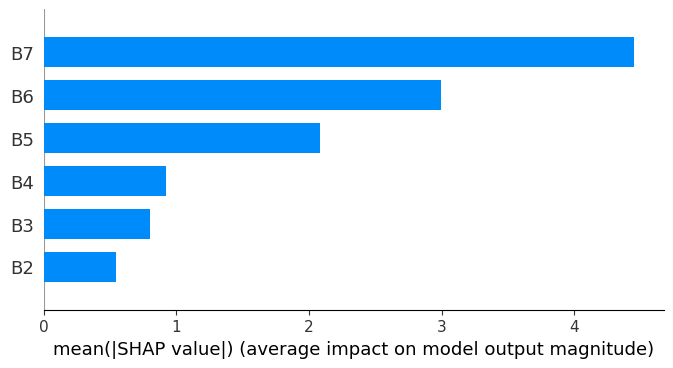

In [5]:
predict_function = lambda X: final_model.predict(X)

# Create an explainer using the Shapley sampling method
explainer = shap.Explainer(predict_function, X)

# Calculate Shapley values for every feature
shap_values = explainer(X)

# Plot summary plot for the features
shap.summary_plot(shap_values,X, plot_type="bar", feature_names=["B2", "B3", "B4", "B5", "B6", "B7"], show=False)
    

plt.savefig("D:/Mip and TSS Project/Graphs_article_2/summary plot SHAP/MP_PS_summary_plot.png", bbox_inches='tight', dpi=600)

# Show the plot
plt.show()

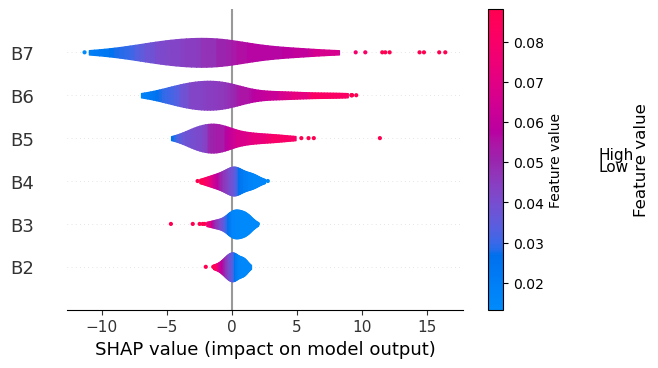

In [7]:
# Plot summary plot for the features
shap.summary_plot(shap_values,X, plot_type="violin", feature_names=["B2", "B3", "B4", "B5", "B6", "B7"], 
                  color=plt.cm.Blues, show=False)  # Provide appropriate feature names

plt.colorbar(label='Feature value')  # Add color scale bar with label

plt.savefig("D:/Mip and TSS Project/Graphs_article_2/summary plot SHAP/for the colorramp_MP_PS_summary_plot_violin.png", bbox_inches='tight', dpi=600)

# Show the plot
plt.show()

Vizualize the scoring for the Kfolds

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `b

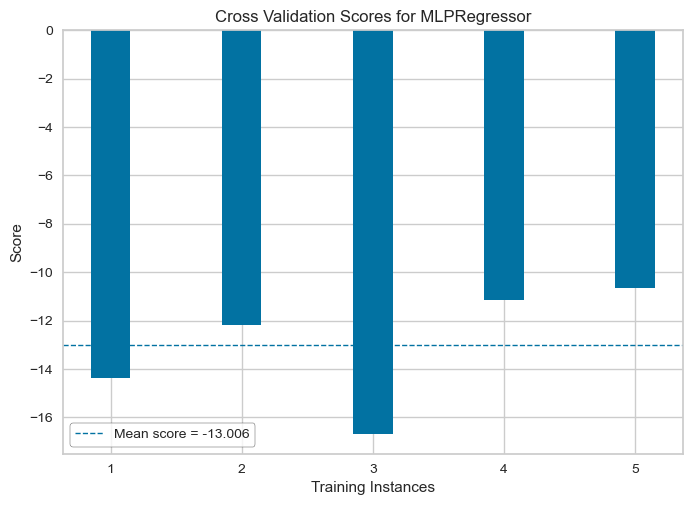

In [27]:
from yellowbrick.model_selection import cv_scores
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
visulazizer = cv_scores (final_model, X, y, cv=kfold, scoring="neg_mean_absolute_error")

Split the data into training and testing and calcuate metrics for testing dataset

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2)
final_model_2=final_model.fit(X_train, y_train)
y_pred_test=final_model_2.predict (X_test)
r2_test=r2_score (y_pred_test, y_test)
rmse_test=mean_squared_error (y_pred_test, y_test, squared=False)
print (r2_test, rmse_test)


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:603: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


-1.8361464803334822 15.908926352306446


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (865) reached and the optimization hasn't converged yet.
  warnings.warn(


metrics for training dataset

In [23]:
y_pred_train=final_model_2.predict (X_train)
r2_train=r2_score (y_pred_train, y_train)
rmse_train=mean_squared_error (y_pred_train, y_train, squared=False)
print (r2_train, rmse_test)

-1.8557242970296155 15.908926352306446


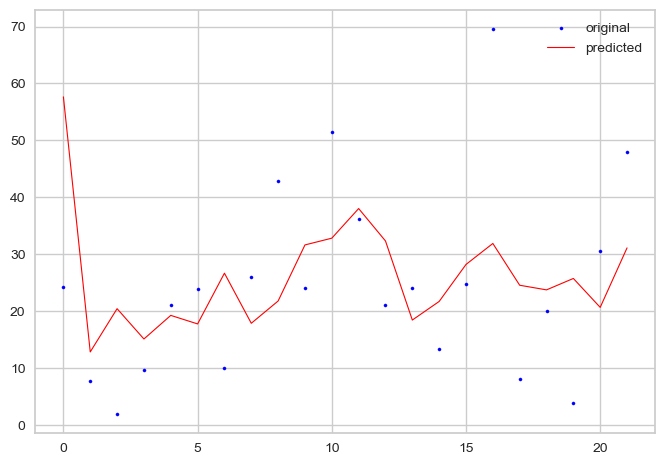

In [25]:
x_axes = range(len(y_pred_test))
plt.scatter(x_axes, y_test, s=5, color="blue", label="original")
plt.plot(x_axes, y_pred_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


In [10]:
data_1=rasterio.open ("D:/Mip and TSS Project/spatiotemporal test/MP_longitudnal/Direct estimation by PS/37 TiszaroffTiszasuly/subset_20220630_091254_30_248f.tif")
data_2=data_1.read ()
data_3=np.swapaxes (data_2, 0, 2)
data_3=np.swapaxes (data_3, 0, 1)
data_3 = data_3.reshape (data_3.shape [0]*data_3.shape [1], data_3.shape [2])
prediction = final_model.predict (data_3)
prediction=prediction.reshape (1,data_2.shape [1] , data_2.shape [2])
prediction=prediction.astype (np.int32)
with rasterio.open ("D:/Mip and TSS Project/spatiotemporal test/MP_longitudnal/Direct estimation by PS/37 TiszaroffTiszasuly/MP_direct_PS_subset_20220630_091254_30_248f.tif", 'w',
                    driver="GTiff", 
                   width=data_2.shape [2], 
                   height=data_2.shape [1],
                   count=1, 
                   crs=data_1.crs, 
                   transform=data_1.transform, 
                   dtype=rasterio.int32) as dst:
    dst.write (prediction)